# Exploration of parameters in genetic algorithms

This notebook gathers the results for the parameter exploration made on the multi-objective genetic algorithm models, considering a binary threshold of 100.

### Brief explanation

In order to understand the effect of each parameters properly, the exploration has been divided into different blocks. In each block, only one parameter is modified while the rest remain fixed. Through this approach, we also guarantee that not too many simulations are required (if you test various parameters simultaneously, you need to create combinations between them). In this specific case, we run a total of 20 genetic algorithms per cluster. As we considered a sample of 9 clusters, we run a total of 180 genetic algorithms. The results for each exploration are presented through the population's evolution. Note that the metric being track is mainly f1 score (if we track for accuracy, the algorithm's hability to detect positive values decreases greatly).

### Import the packages

We import the packages that will be needed. In this case, everything is already contained in the *gatools.py* file, that loads submodules of PyWin module.

In [1]:
import sys
sys.path.insert(0,'../../Tools')
from gatools import *

In [2]:
Y_clusters = pandas.read_csv('../../Data/CoarseGrained/Y_clusters_quan_100_9.csv')
tasks_clusters = list(Y_clusters.columns)

### 1. ALG (ALGorithm)

In this exploration, we study the effect of the algorithm used for the evolution of population. We work with 2 different algorithms **[NSGA2, SPEA2]**.

In [3]:
for task in tasks_clusters:
    globals()[task] = [model for model in os.listdir("./Exploration_multi_100/ALG") if re.match('.*'+str(task),model)]
    globals()[task] = [BasicGA.load(model,"./Exploration_multi_100/ALG") for model in globals()[task]]

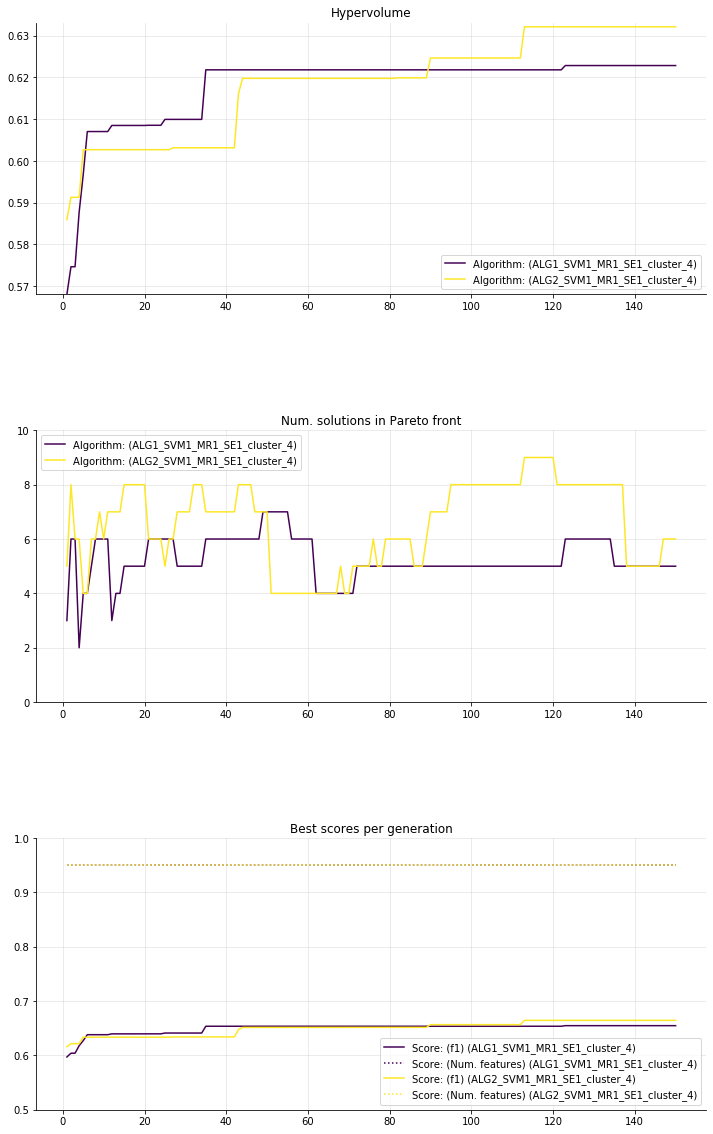

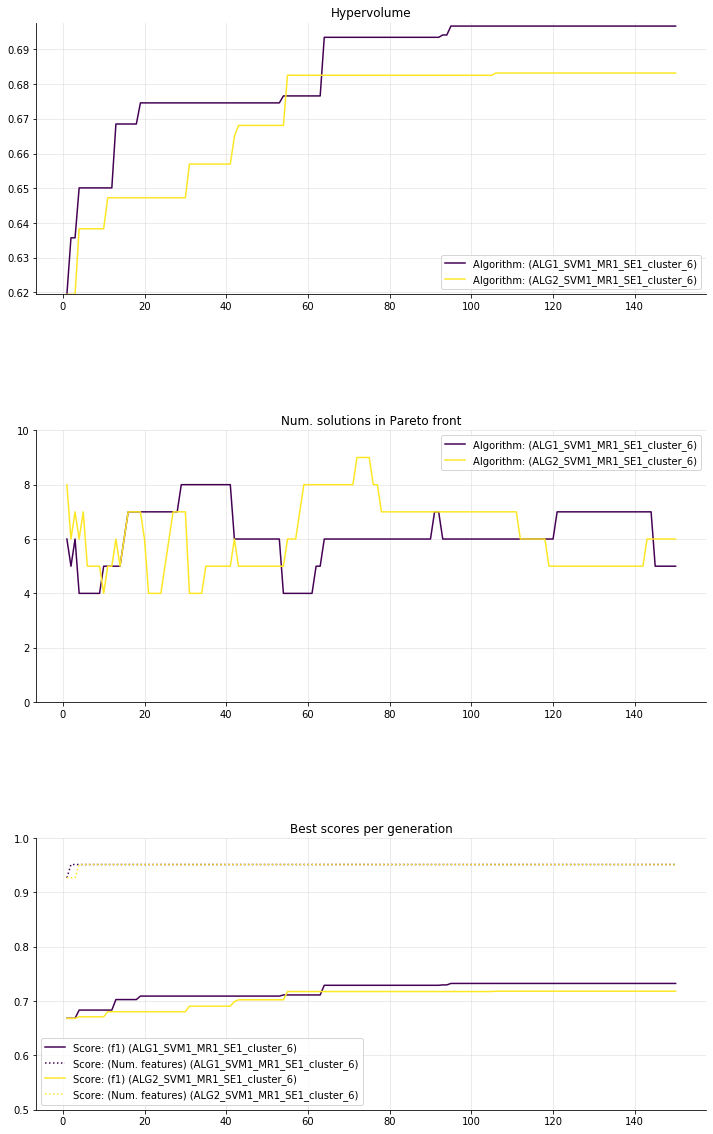

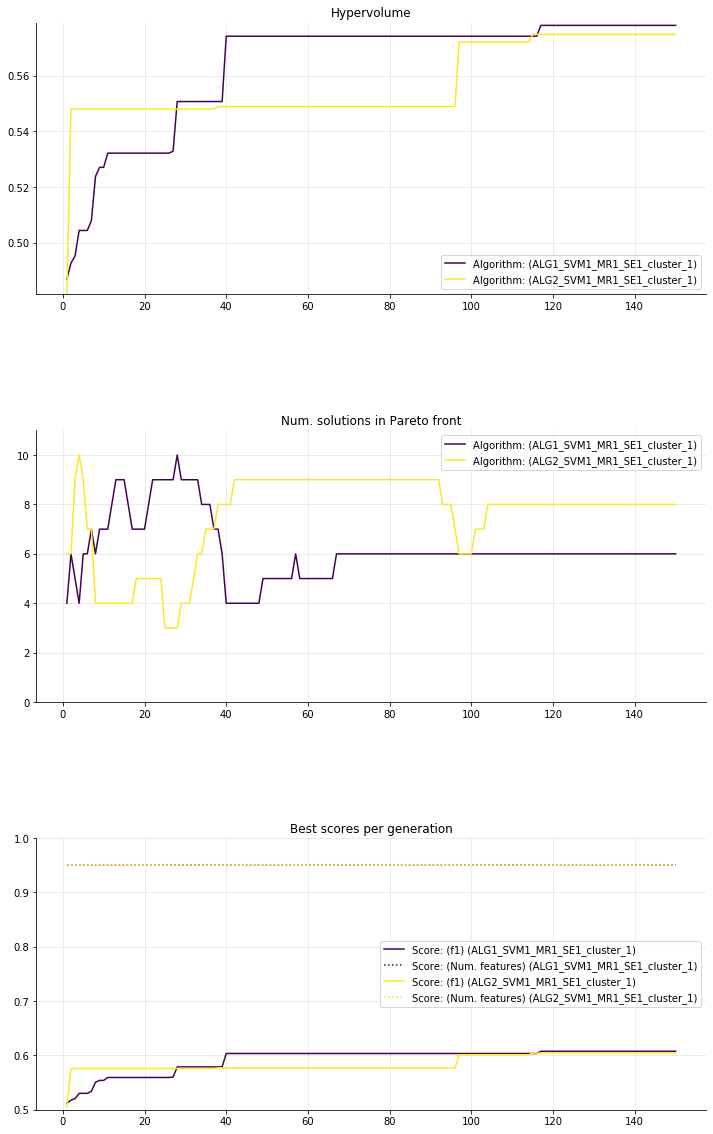

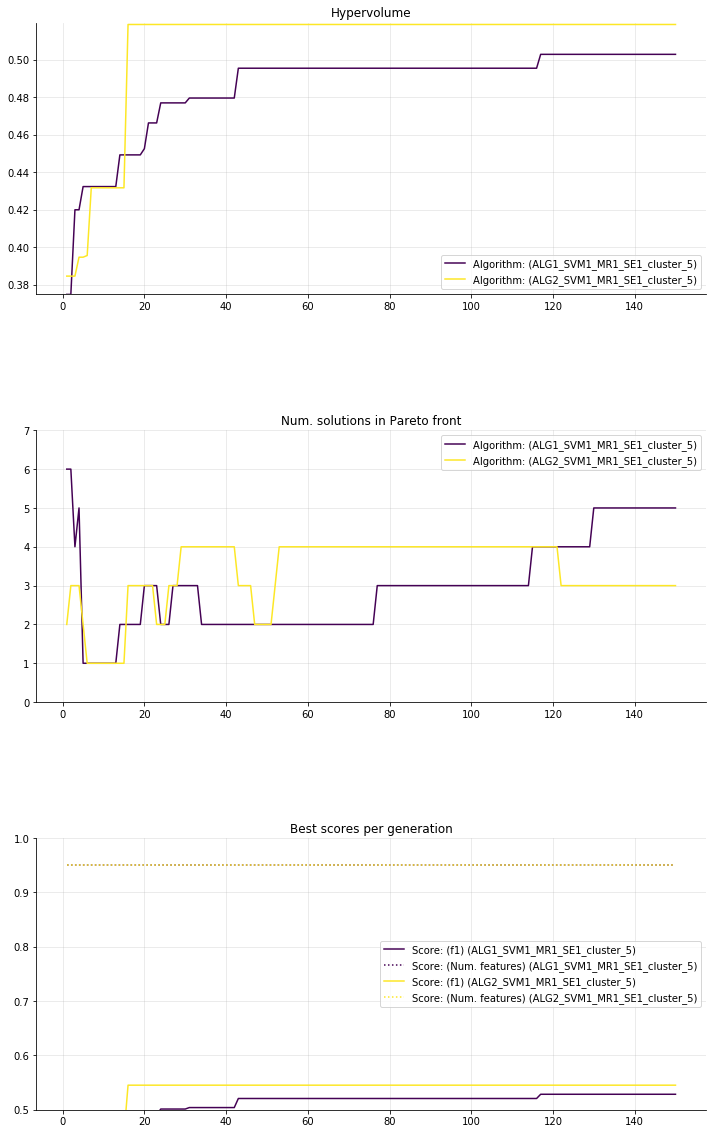

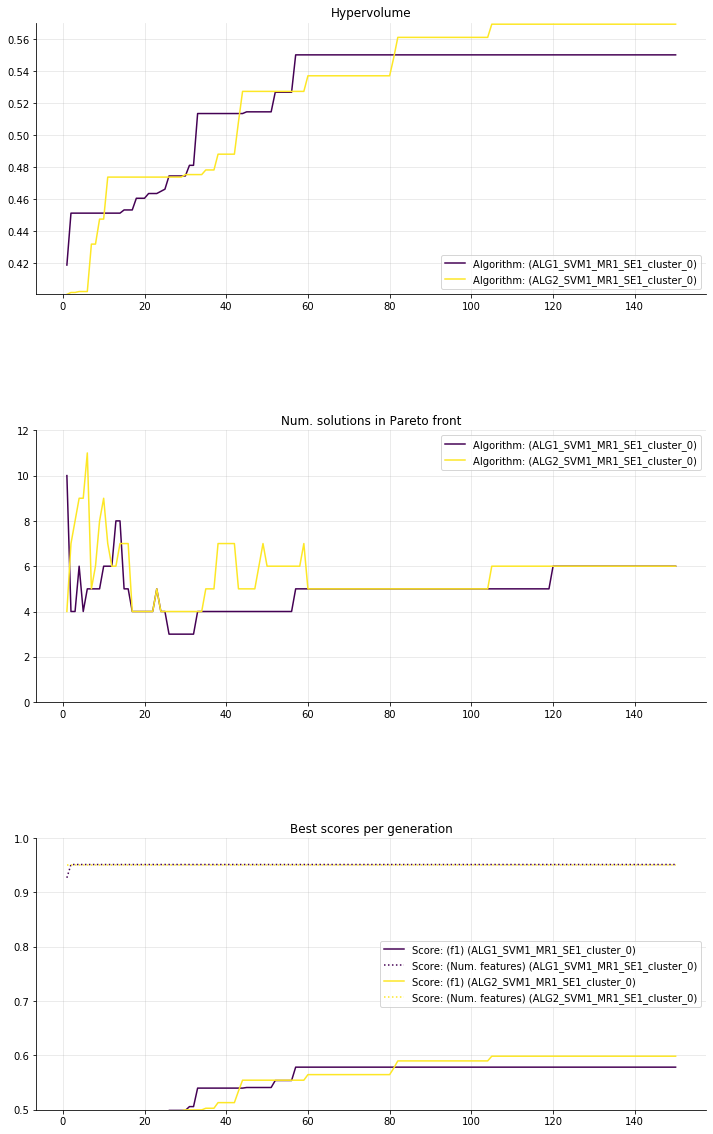

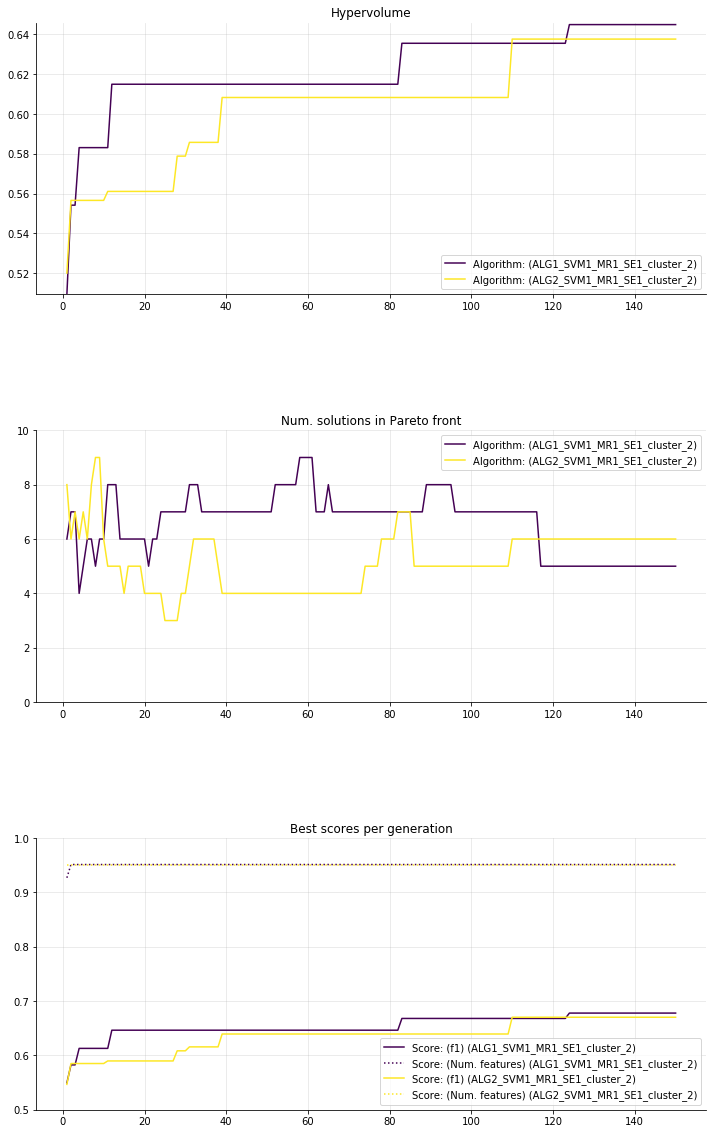

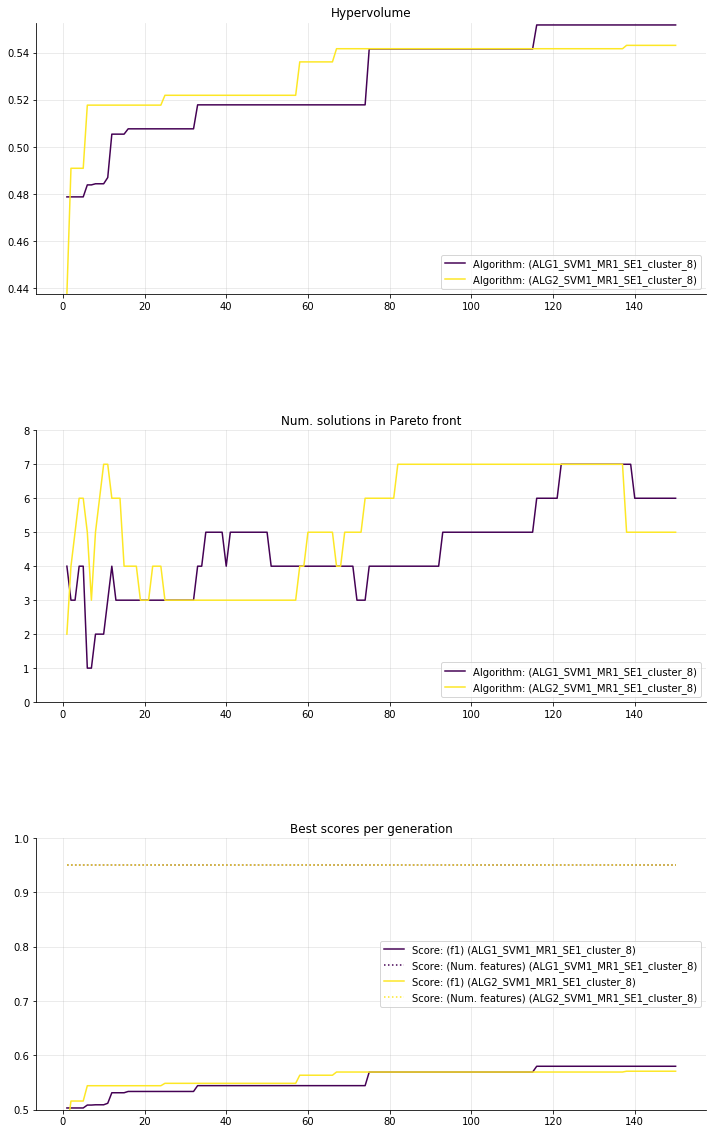

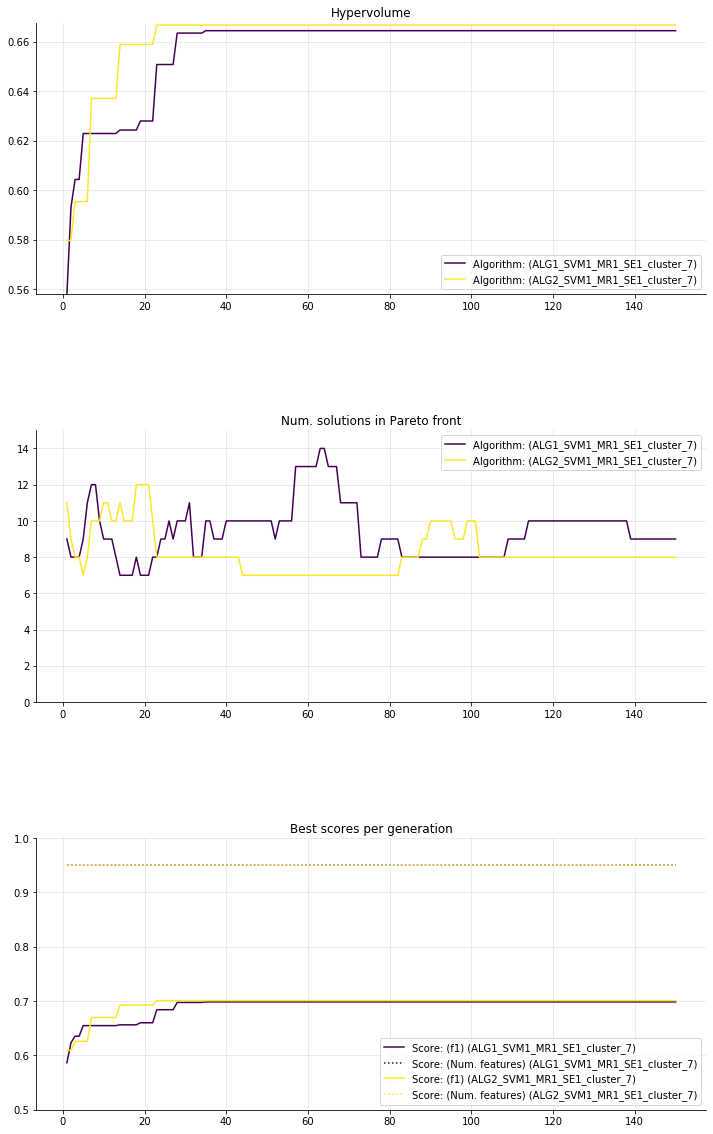

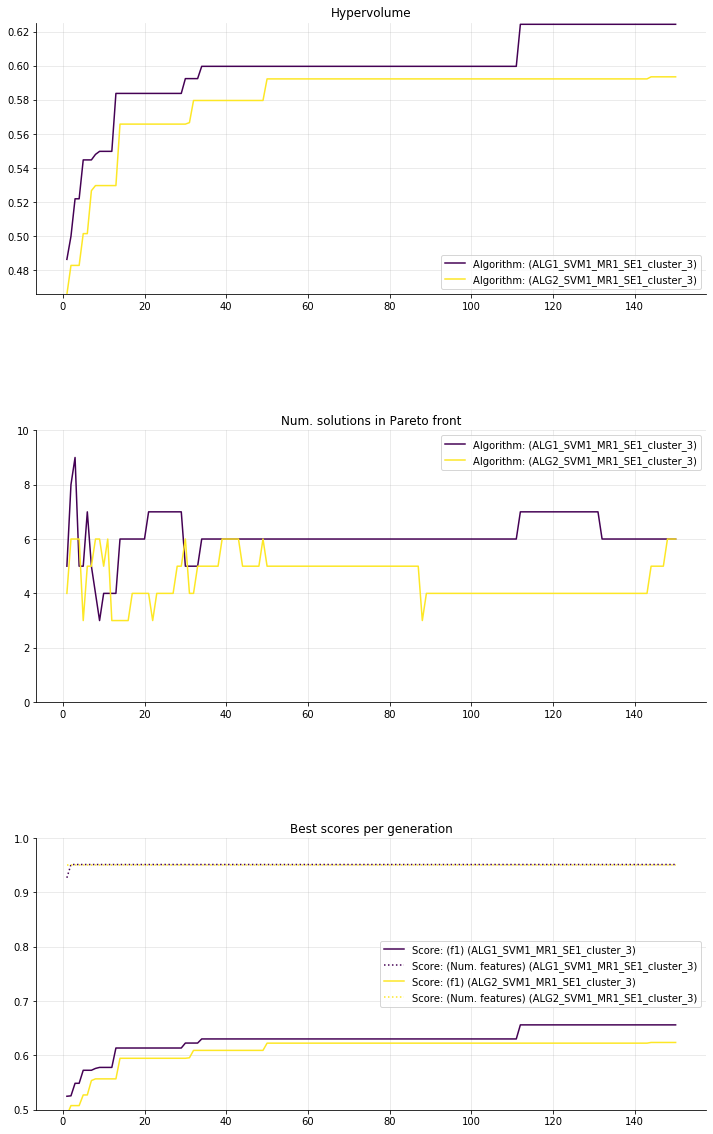

In [4]:
for task in tasks_clusters:
    Plotter.plot_evolution(*globals()[task])

No algorithm performs clearly better than the other, varying with the cluster considered. Therefore, **both algorithms should be considered**. One thing to remark is that the evolution seems to be much more stable than in the mono-objective algorithms (the fitness improves gradually till a plateu is reached).

### 2. SVM (Support Vector Machines)

In this exploration, we study the effect of the regularization parameter in the Support Vector Machine estimator. We work with 3 different values **[2, 10, 50]** (the strength of the regularization is inversely proportional to this parameter).

In [5]:
for task in tasks_clusters:
    globals()[task] = [model for model in os.listdir("./Exploration_multi_100/SVM") if re.match('.*'+str(task),model)]
    globals()[task] = [NSGA2.load(model,"./Exploration_multi_100/SVM") for model in globals()[task]]

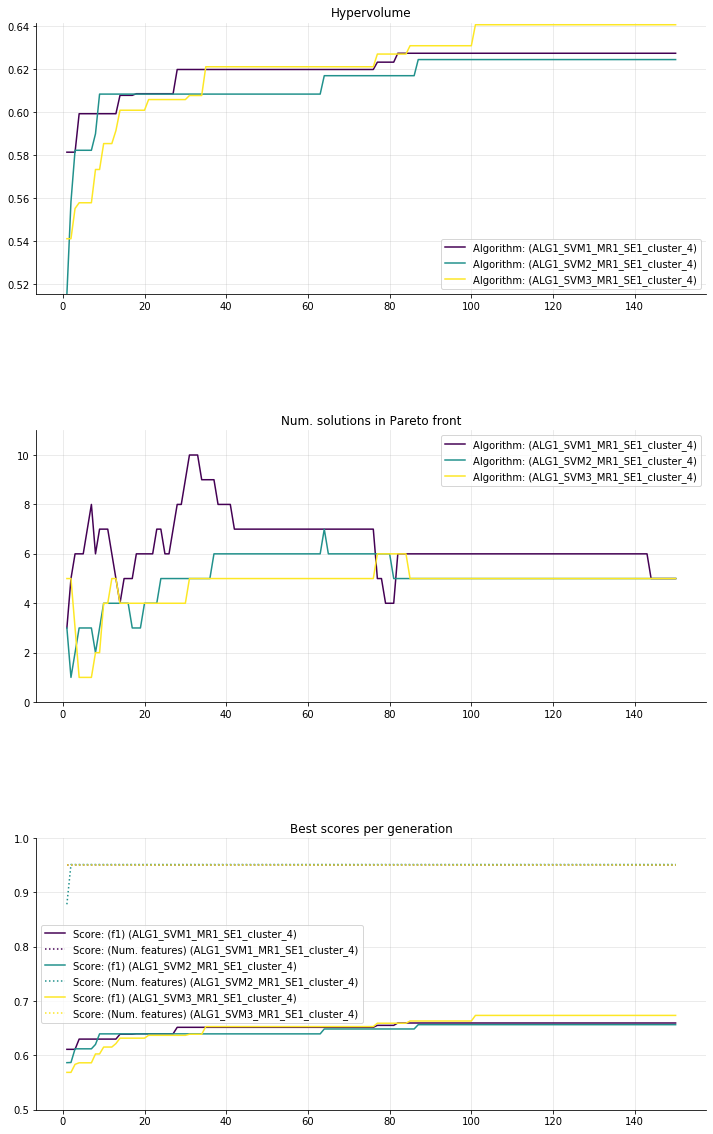

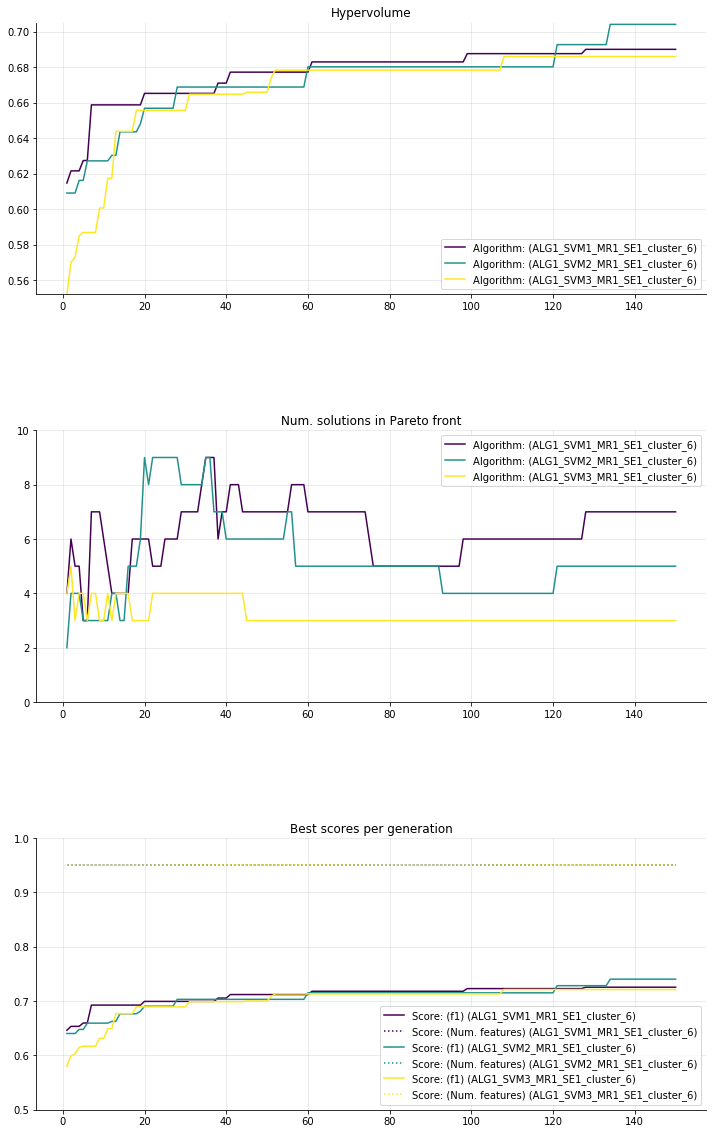

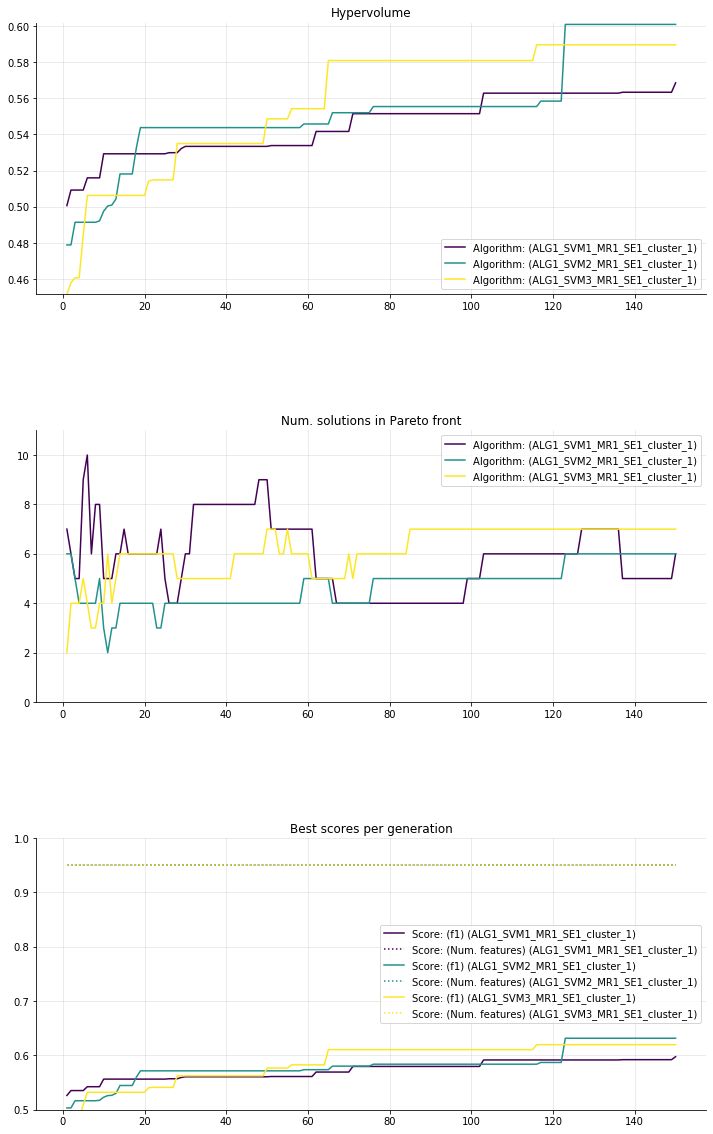

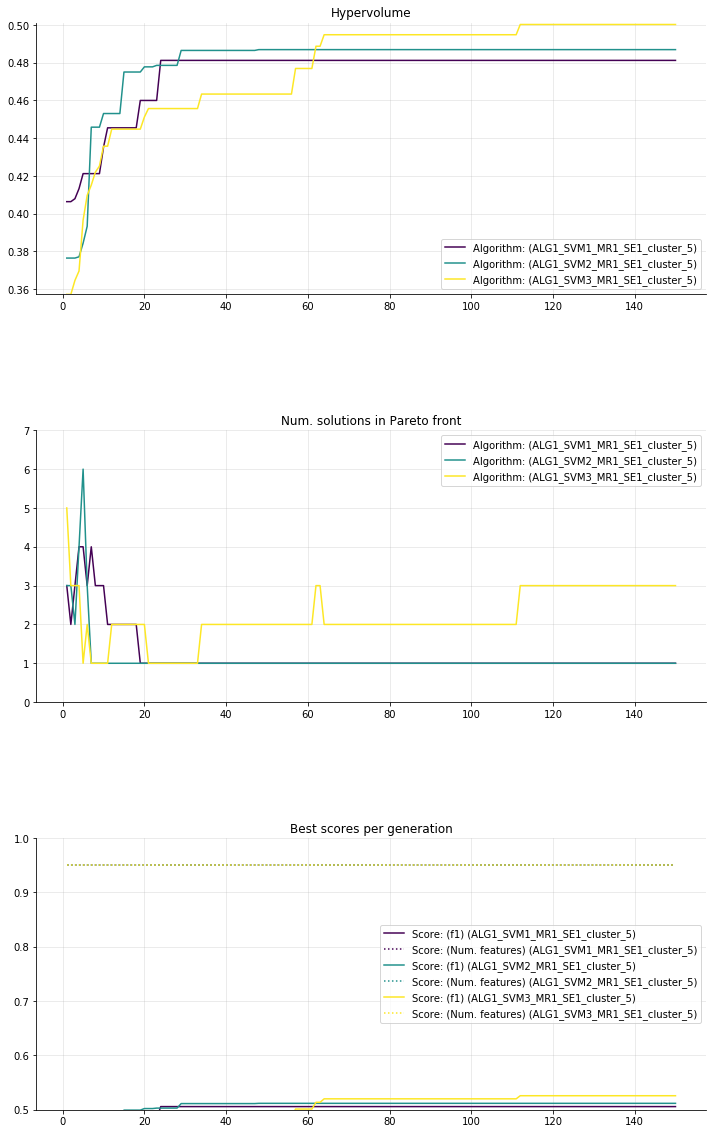

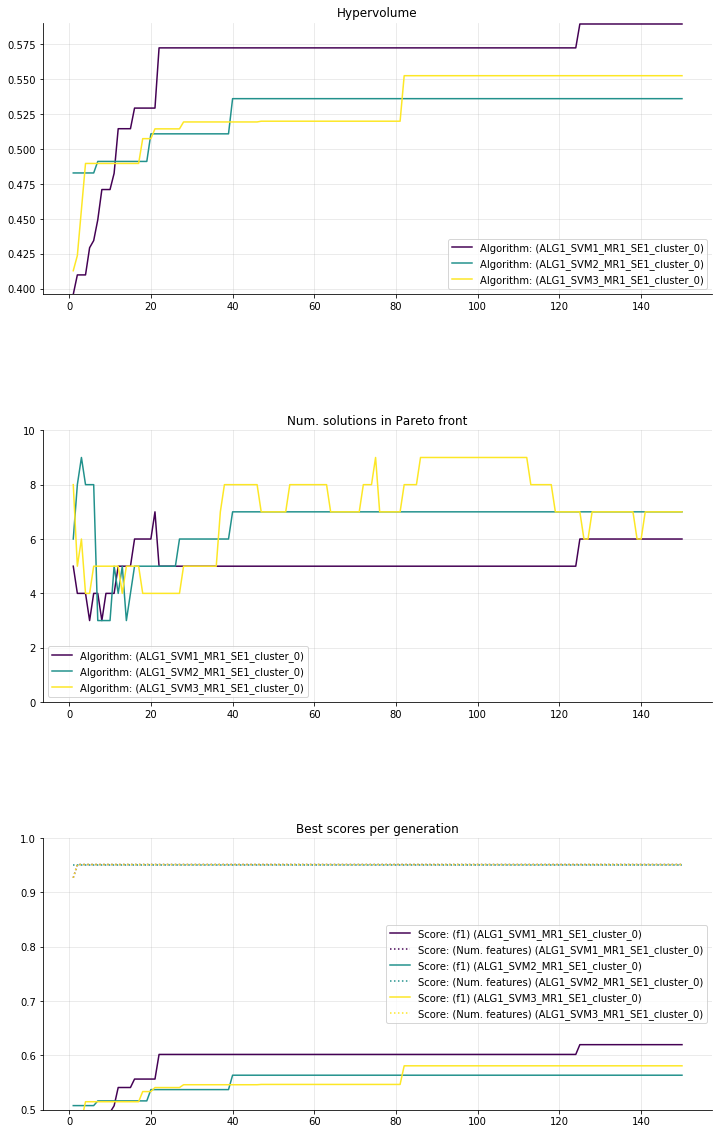

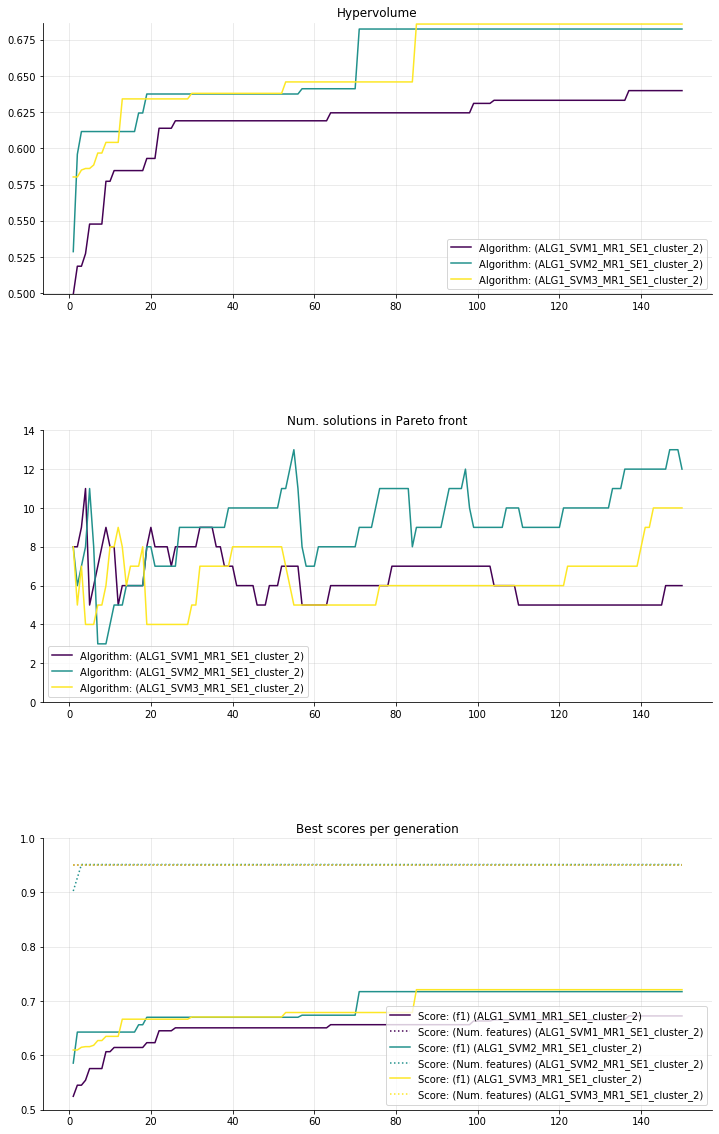

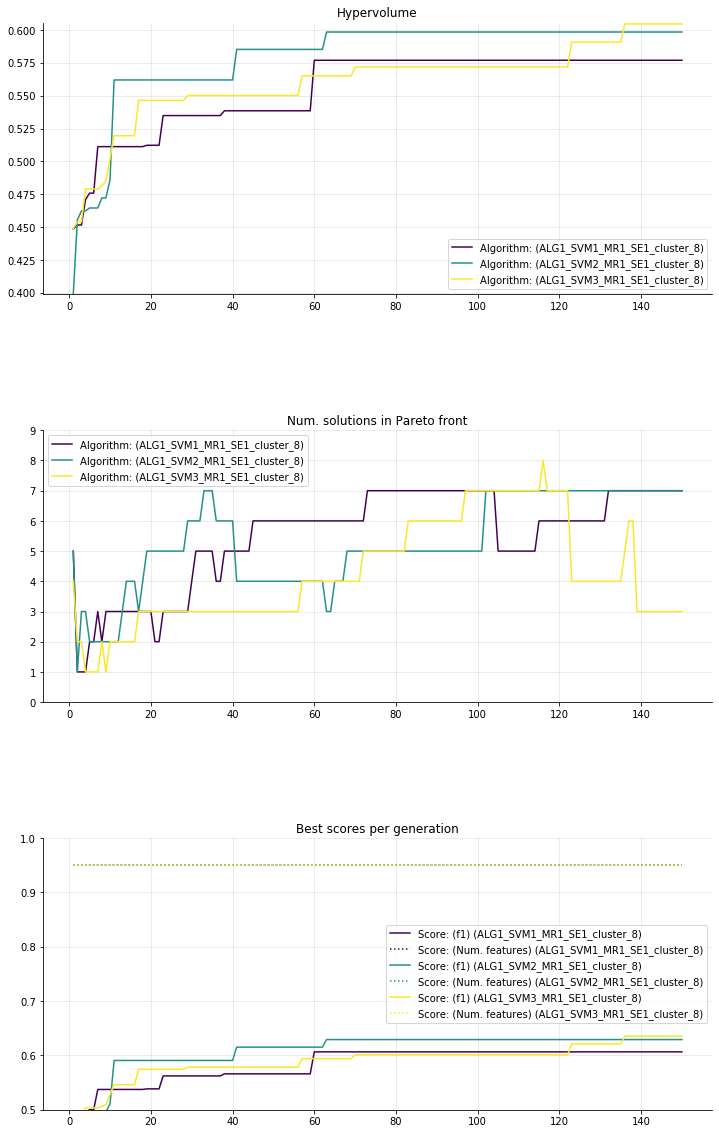

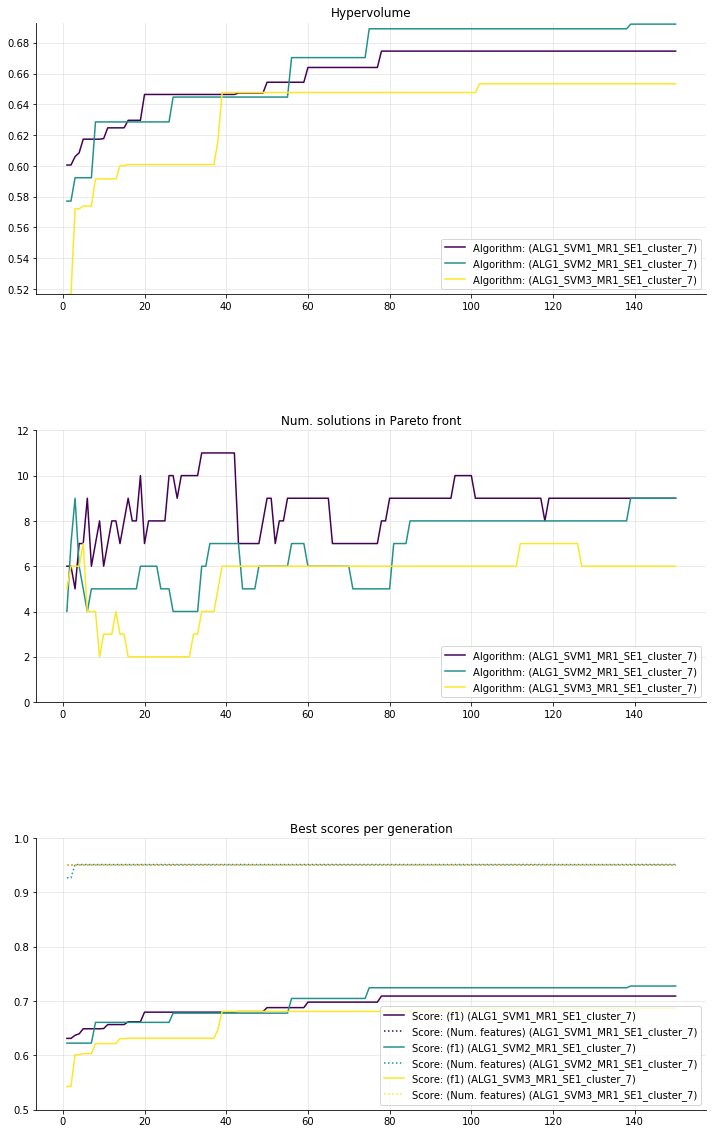

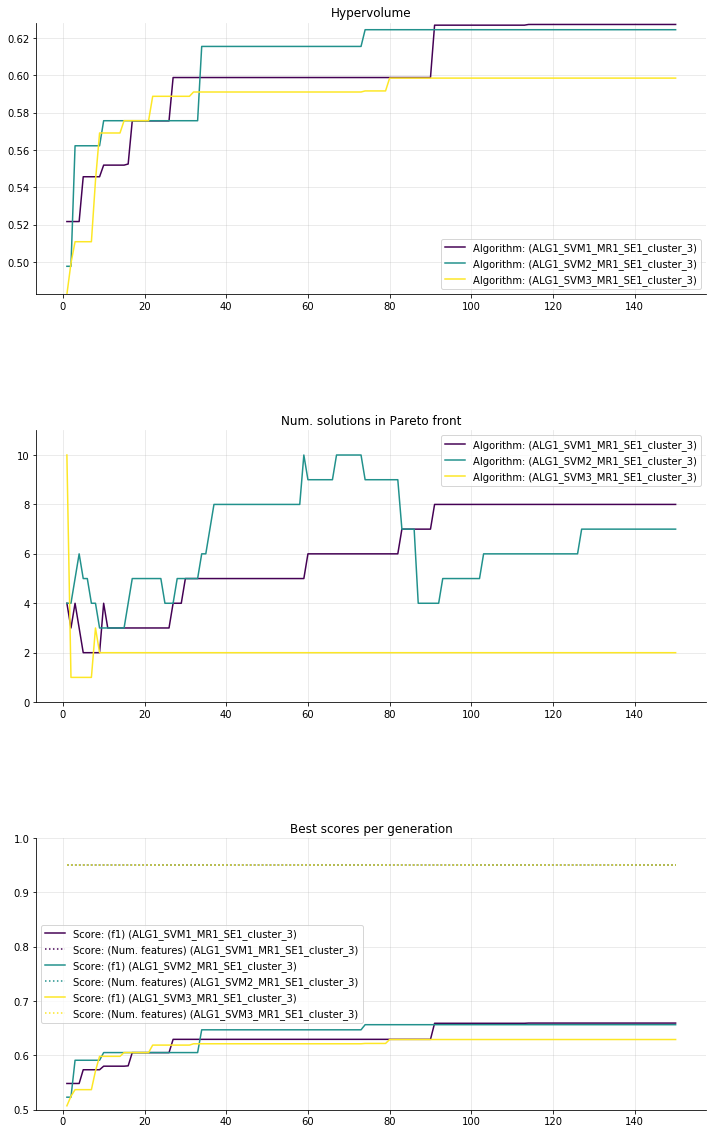

In [6]:
for task in tasks_clusters:
    Plotter.plot_evolution(*globals()[task])

While there is some variation among clusters and no combination appears to be clearly better than other, the best results are generally obtained with higher regularization parameter. Therefore, **a high value, with a tendency to turn intermediate and low, should be considered**.

### 3. MNB (Multinomial Naive Bayes)

In this exploration, we study the effect of the smoothing parameter in the Multinomial Naive Bayes estimator. We work with 3 different values **[0.2, 1, 5]**.

In [7]:
for task in tasks_clusters:
    globals()[task] = [model for model in os.listdir("./Exploration_multi_100/MNB") if re.match('.*'+str(task),model)]
    globals()[task] = [NSGA2.load(model,"./Exploration_multi_100/MNB") for model in globals()[task]]

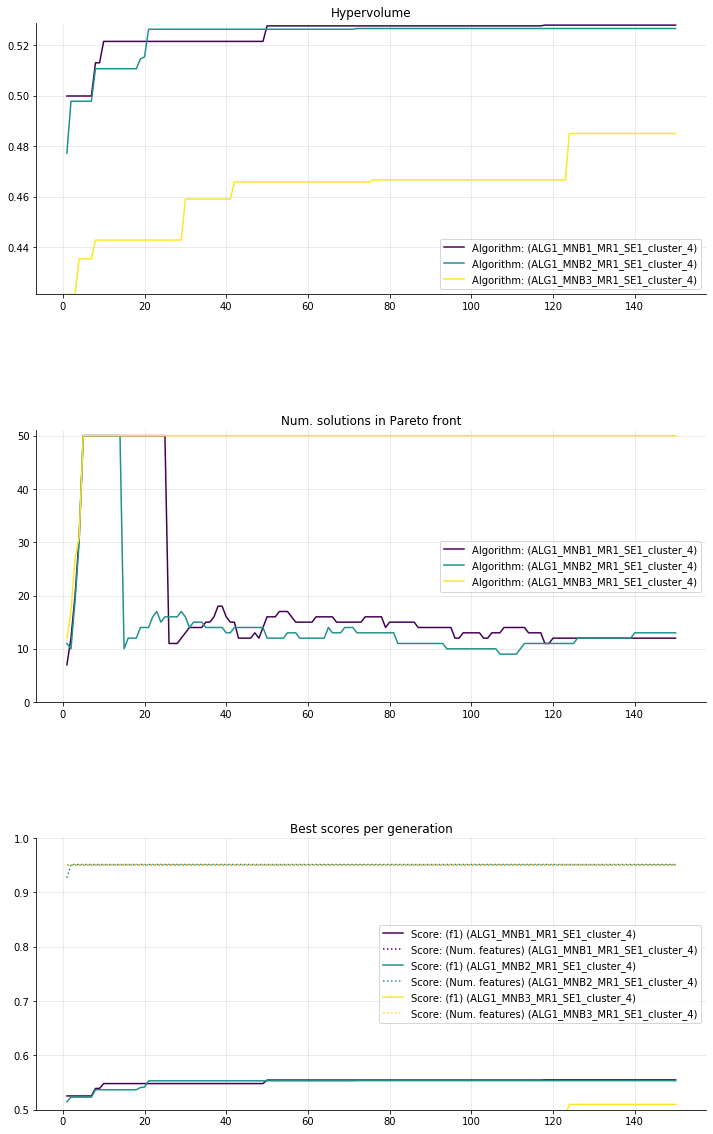

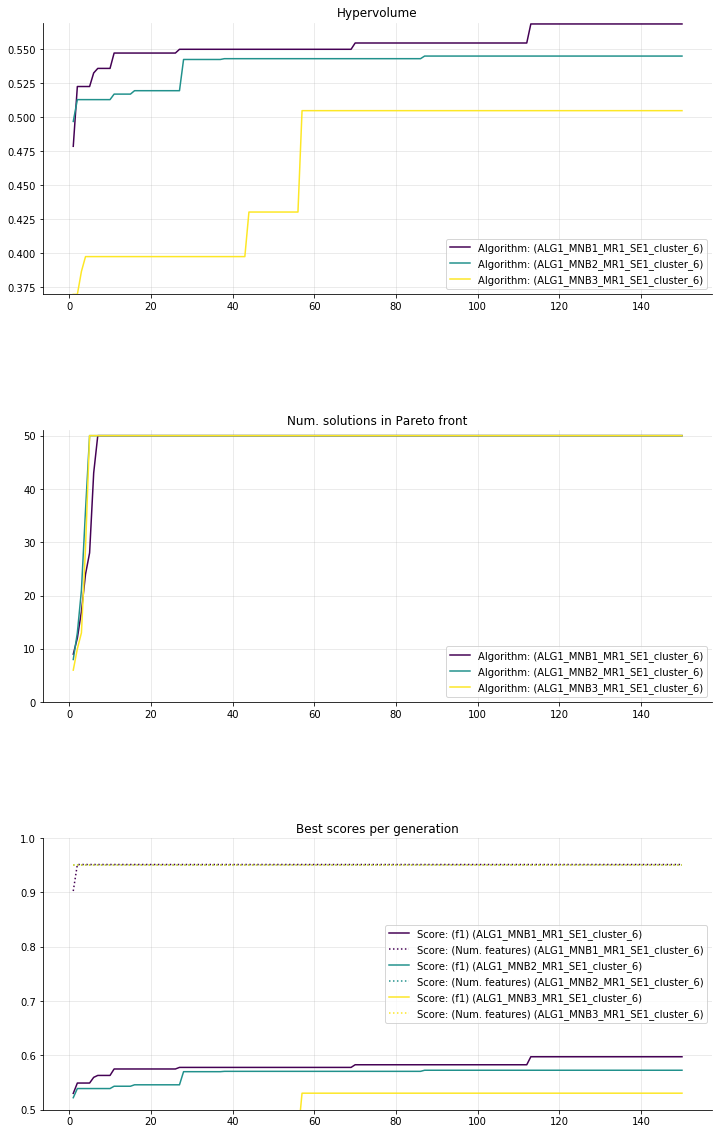

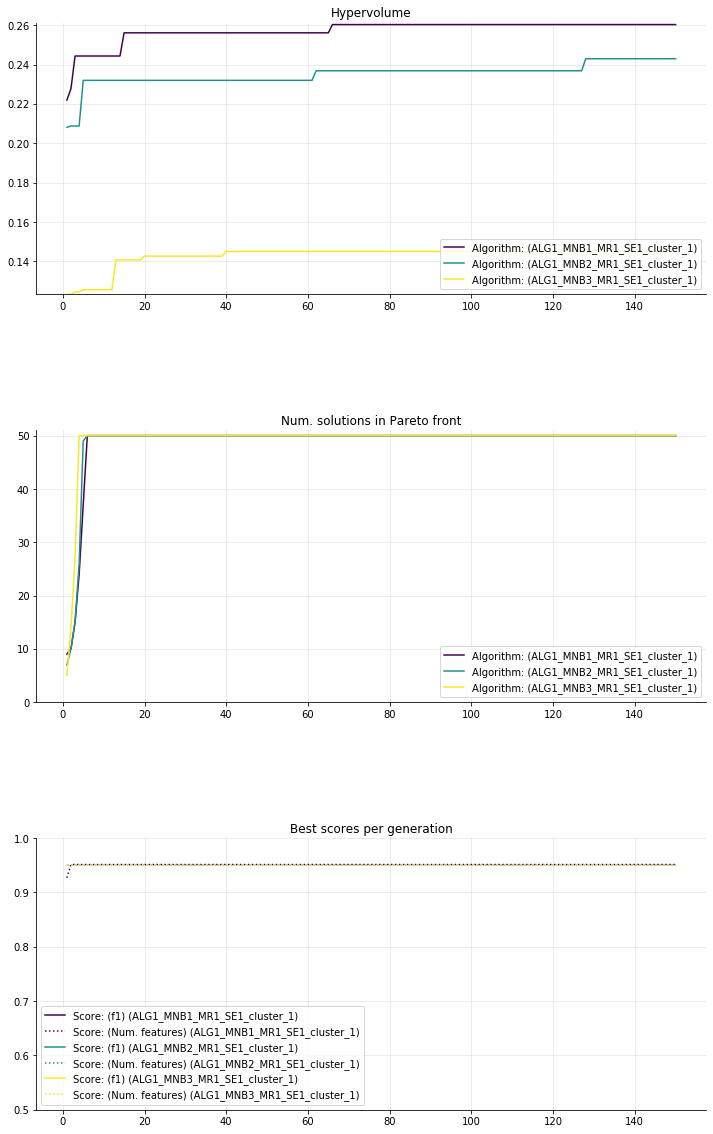

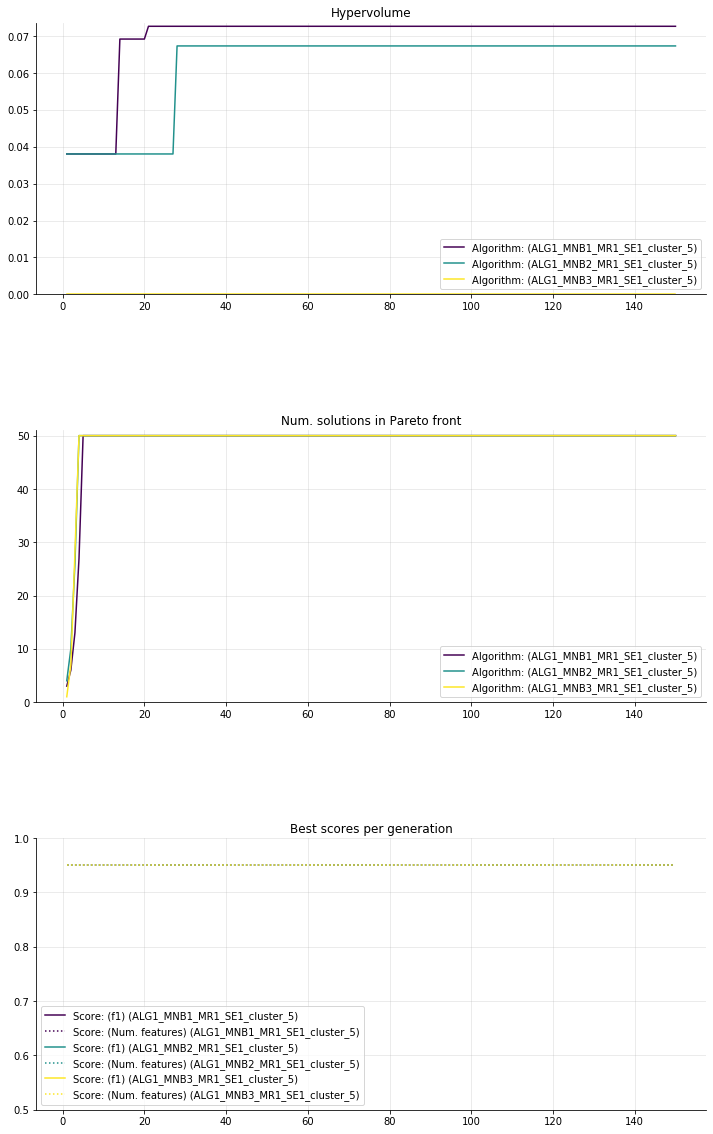

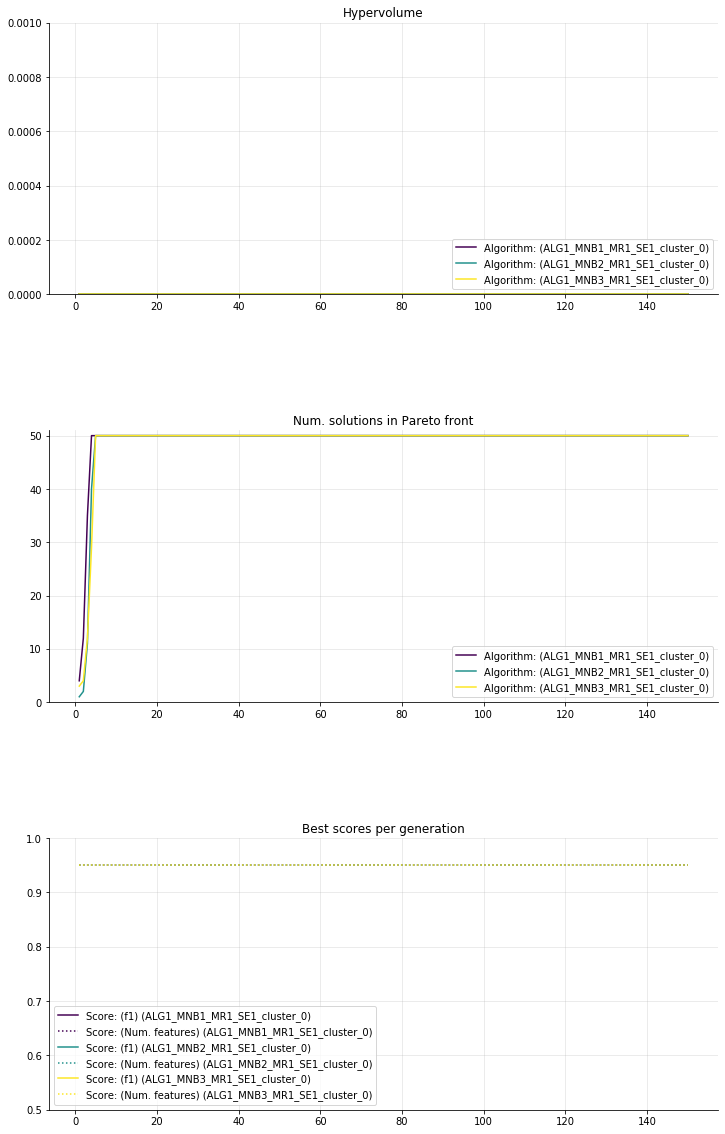

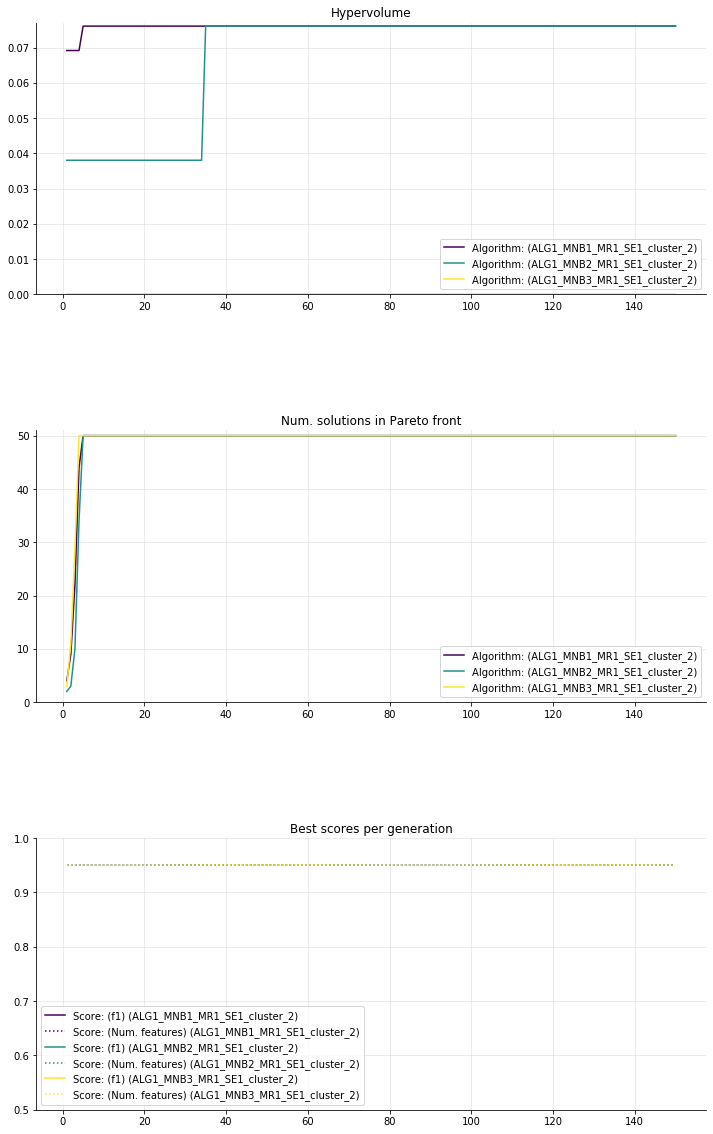

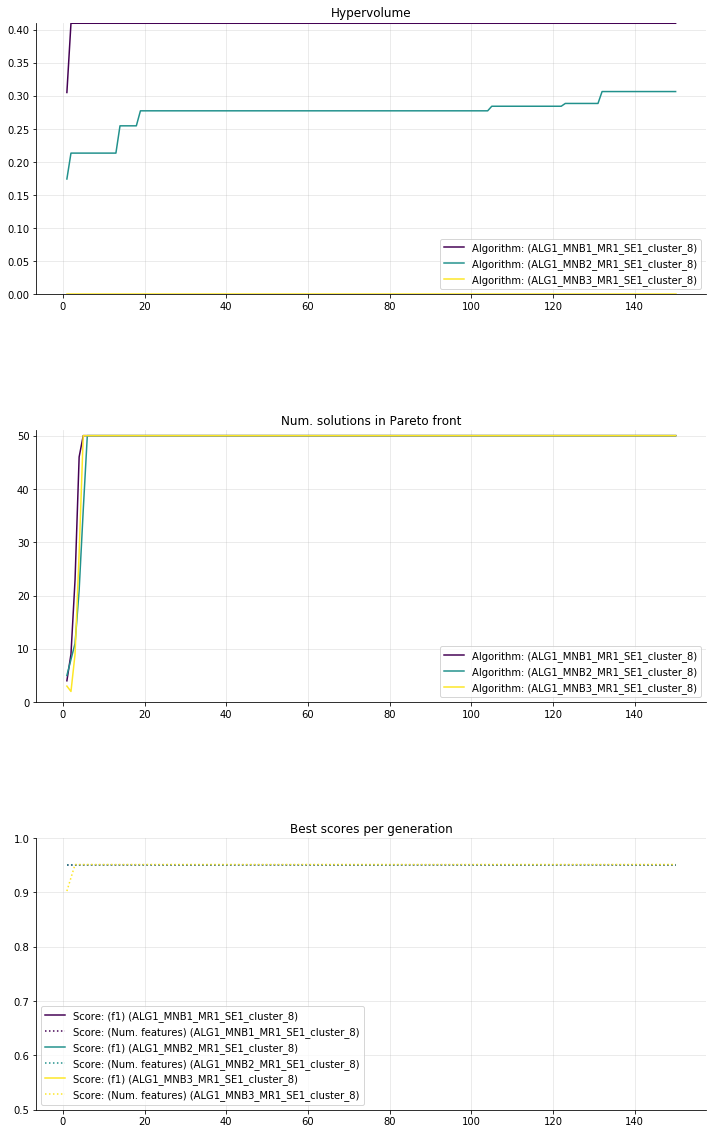

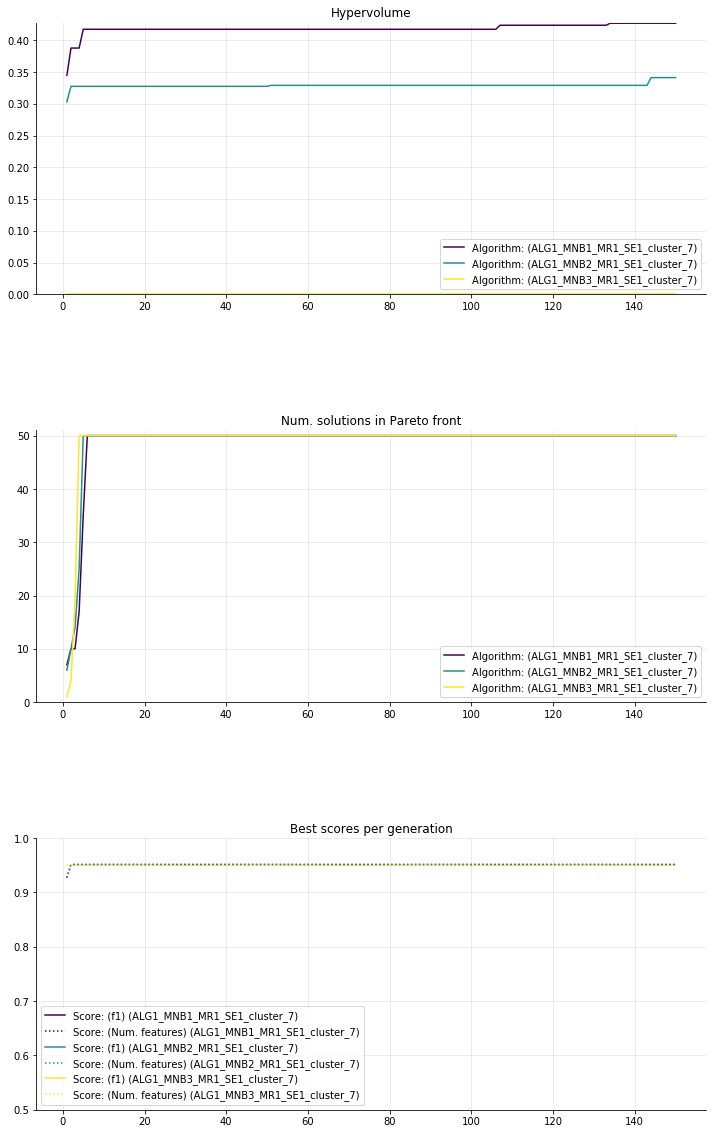

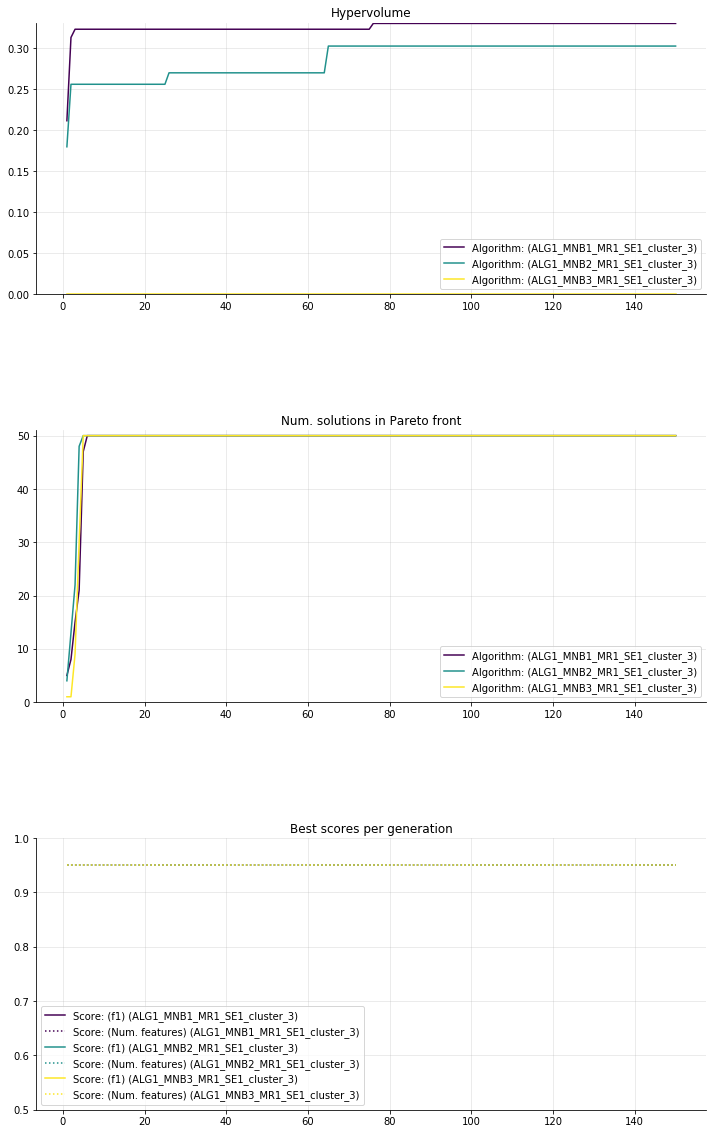

In [8]:
for task in tasks_clusters:
    Plotter.plot_evolution(*globals()[task])

In this case, the trend is pretty clear. The best results are obtained when the smoothing value is low, being very bad when it is high. This estimator yields much worse results than the Support Vector Machine (specially in clusters where the number of positive values is low). Therefore, **it should not be considered**.

### 4. DTC (Decision Tree Classifier)

In this exploration, we study the effect of the depth and splits in the Decision Tree Classifier estimator. We work with 2 different values for maximum depth, minimum number of samples to split an internal node and minimum number of samples to be at an external node **[(5,5,5), (15,5,5), (5,2,2), (15,2,2)]**.

In [9]:
for task in tasks_clusters:
    globals()[task] = [model for model in os.listdir("./Exploration_multi_100/DTC") if re.match('.*'+str(task),model)]
    globals()[task] = [NSGA2.load(model,"./Exploration_multi_100/DTC") for model in globals()[task]]

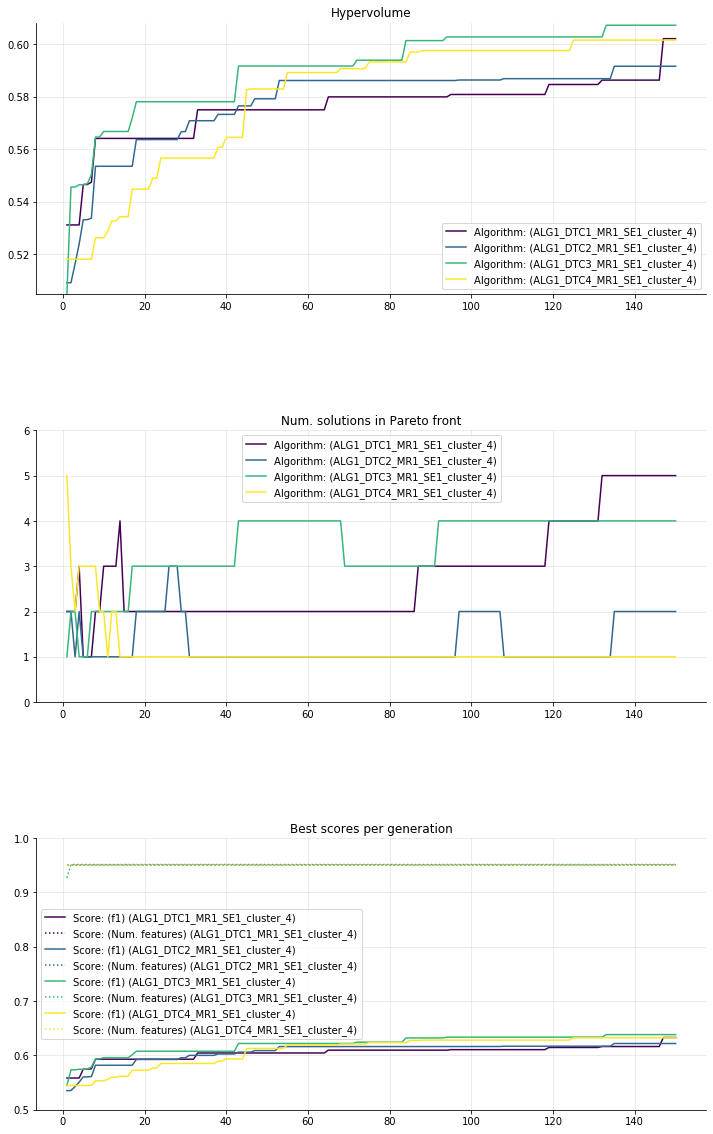

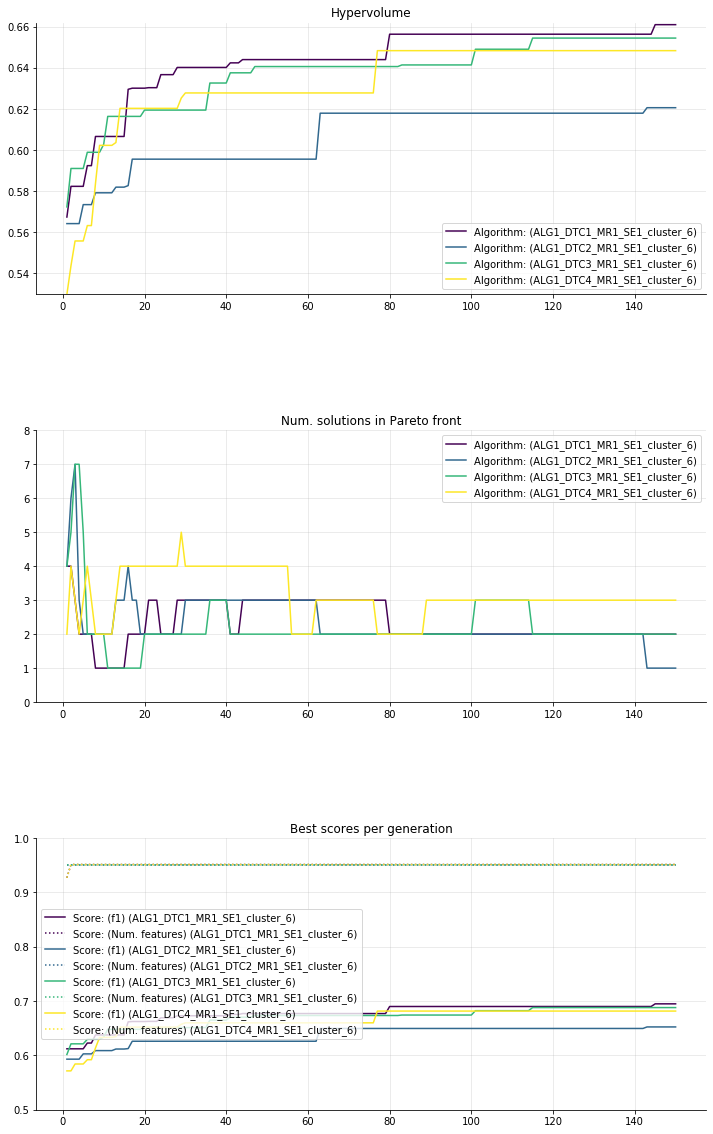

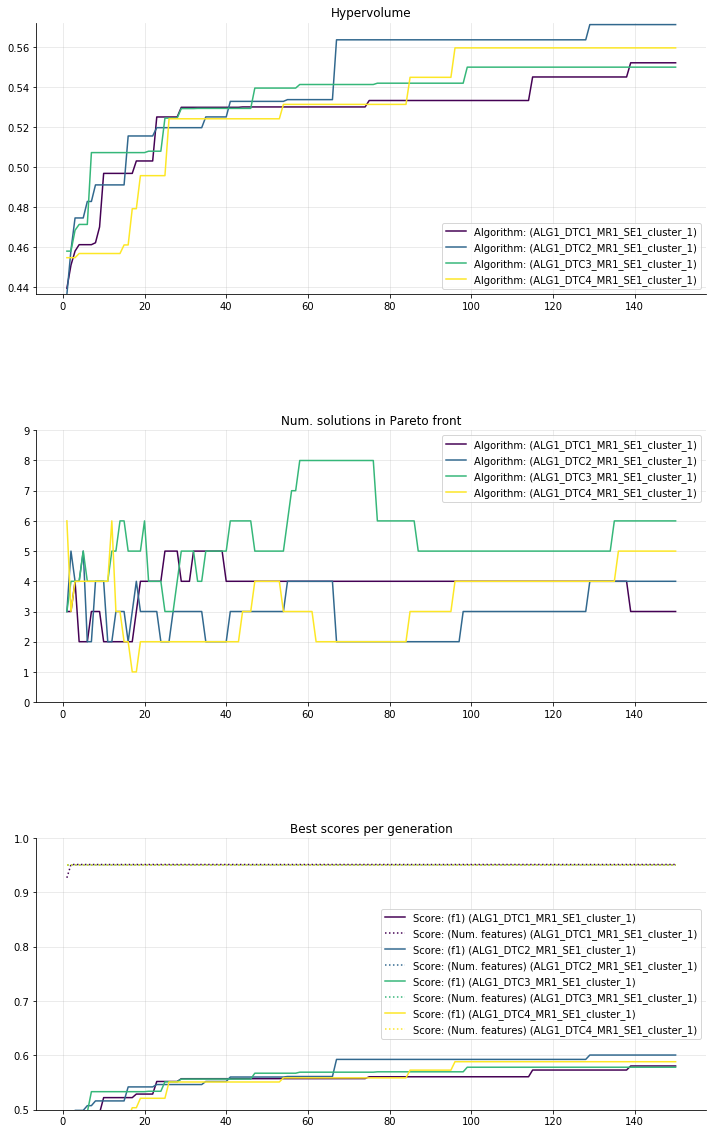

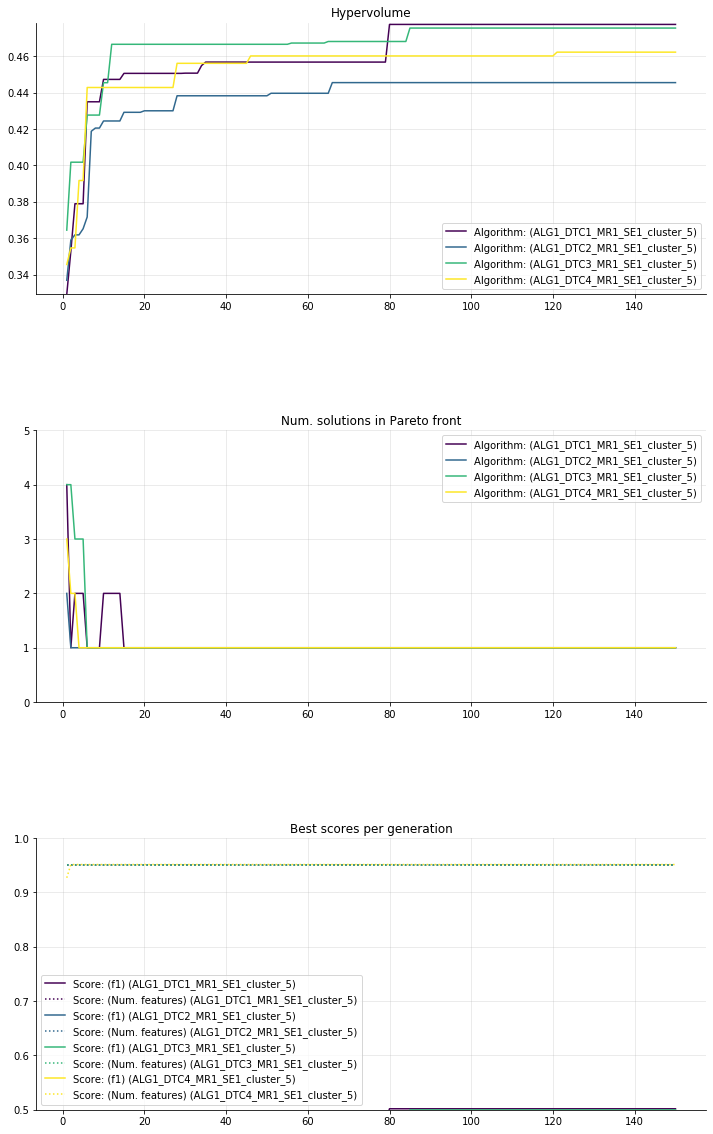

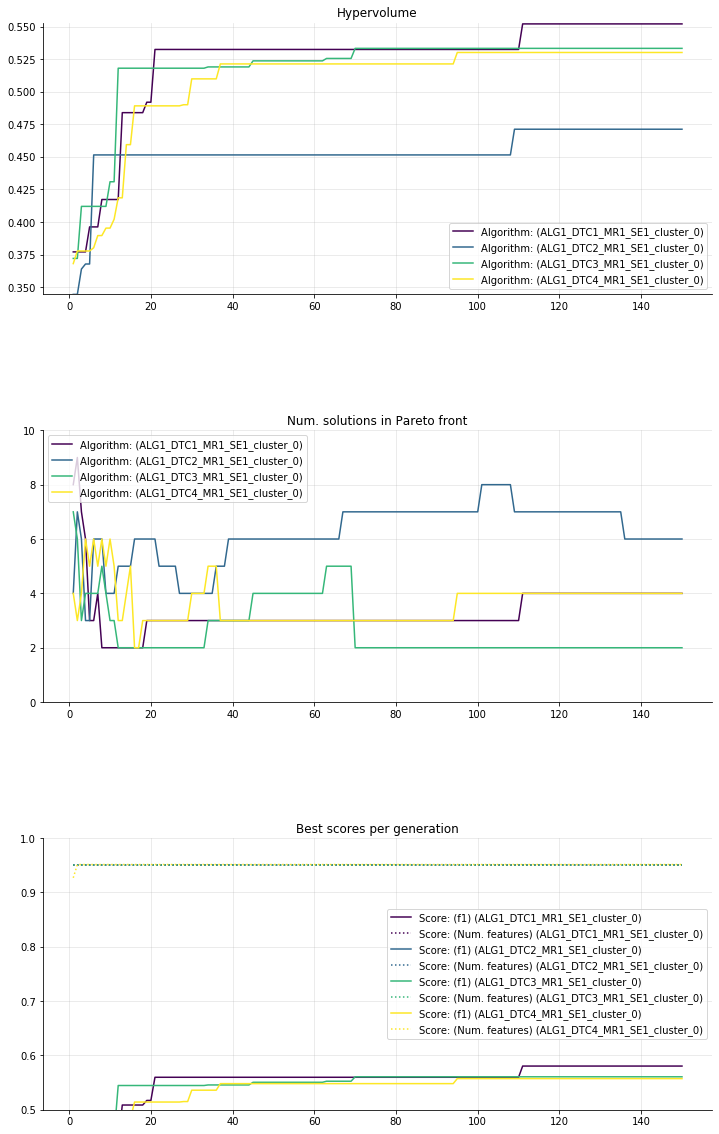

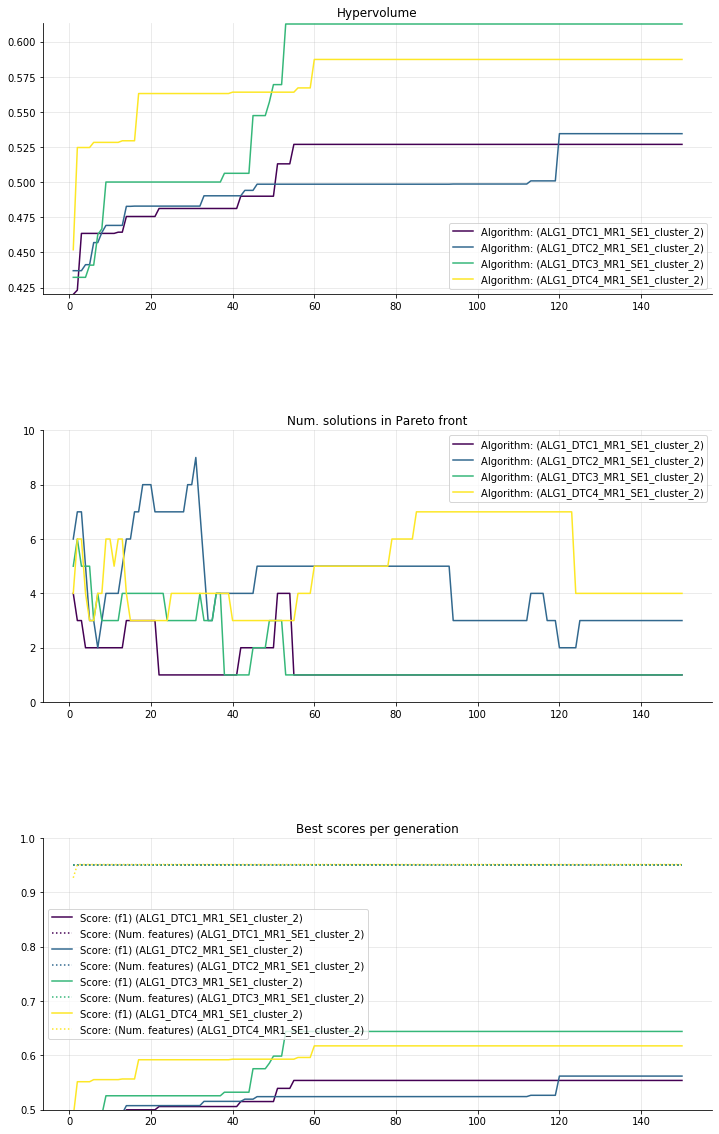

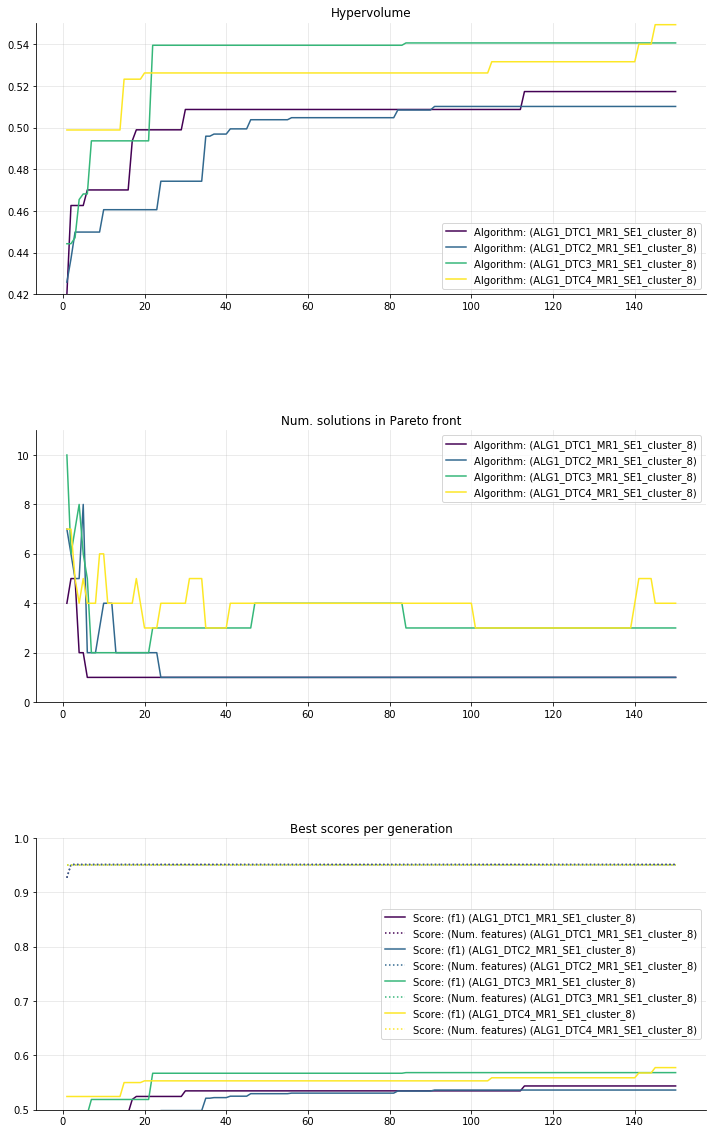

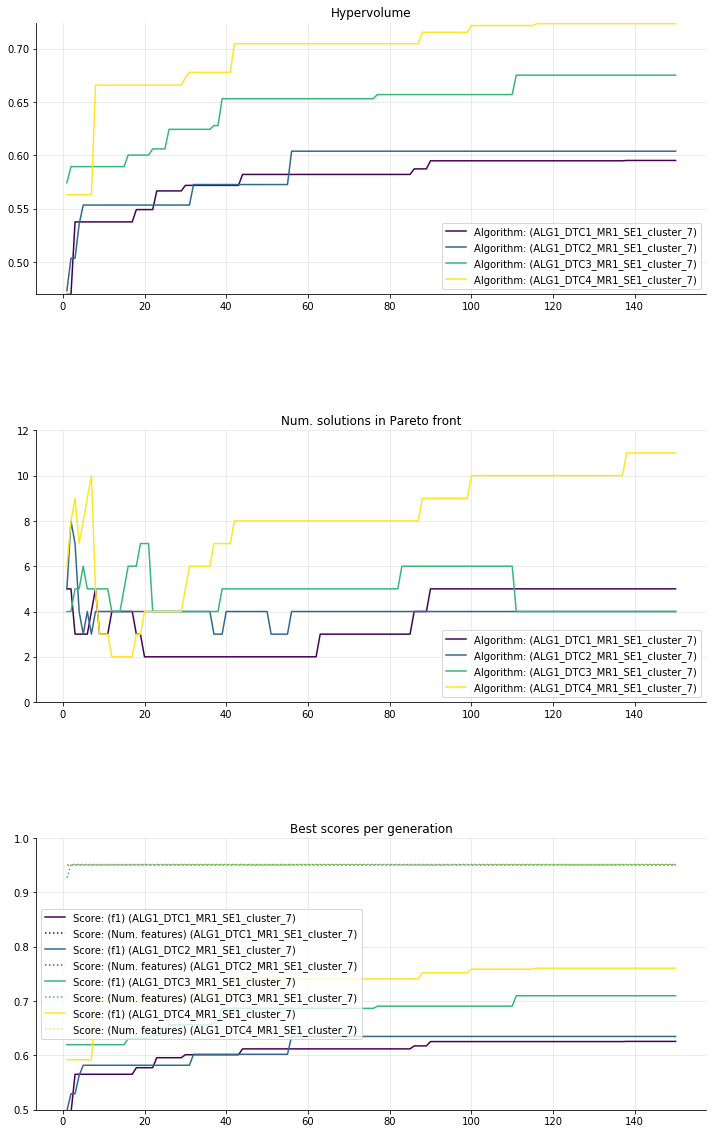

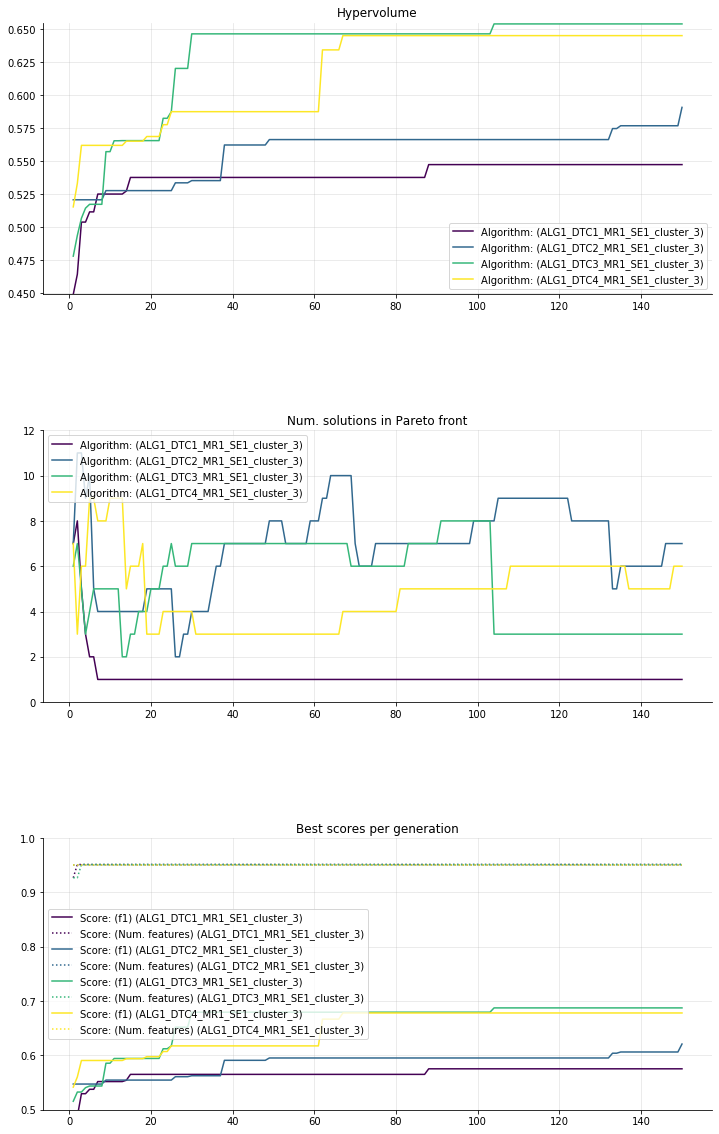

In [10]:
for task in tasks_clusters:
    Plotter.plot_evolution(*globals()[task])

While there is some variation among clusters and no combination appears to be clearly better than other, the best results are generally obtained with reduced depth. This estimator yields results substantially worse than the Support Vector Machine. Therefore, **it should not be considered**. 

### 5. ES (EStimator)

In this exploration, we study the effect of using hypervolumes with different number of metrics. We work with **[f1+features, accuracy+f1+features]**.

In [11]:
for task in tasks_clusters:
    globals()[task] = [model for model in os.listdir("./Exploration_multi_100/ES") if re.match('.*'+str(task),model)]
    globals()[task] = [NSGA2.load(model,"./Exploration_multi_100/ES") for model in globals()[task]]

After a quick exploration on some of the clusters, we can see that adding accuracy might in some cases result in better models. At the same time, this increases the computational requirements. Since it is difficult to establish comparisons between models measuring different metrics, **we could stick to the simplest option for the moment and try adding accuracy latter**.

### 6. MR (Mutation Rate)

In this exploration, we study the effect of the mutation rate applied to individuals at each generation. We work with 3 different values **[0.05, 0.1, 0.15]**.

In [12]:
for task in tasks_clusters:
    globals()[task] = [model for model in os.listdir("./Exploration_multi_100/MR") if re.match('.*'+str(task),model)]
    globals()[task] = [NSGA2.load(model,"./Exploration_multi_100/MR") for model in globals()[task]]

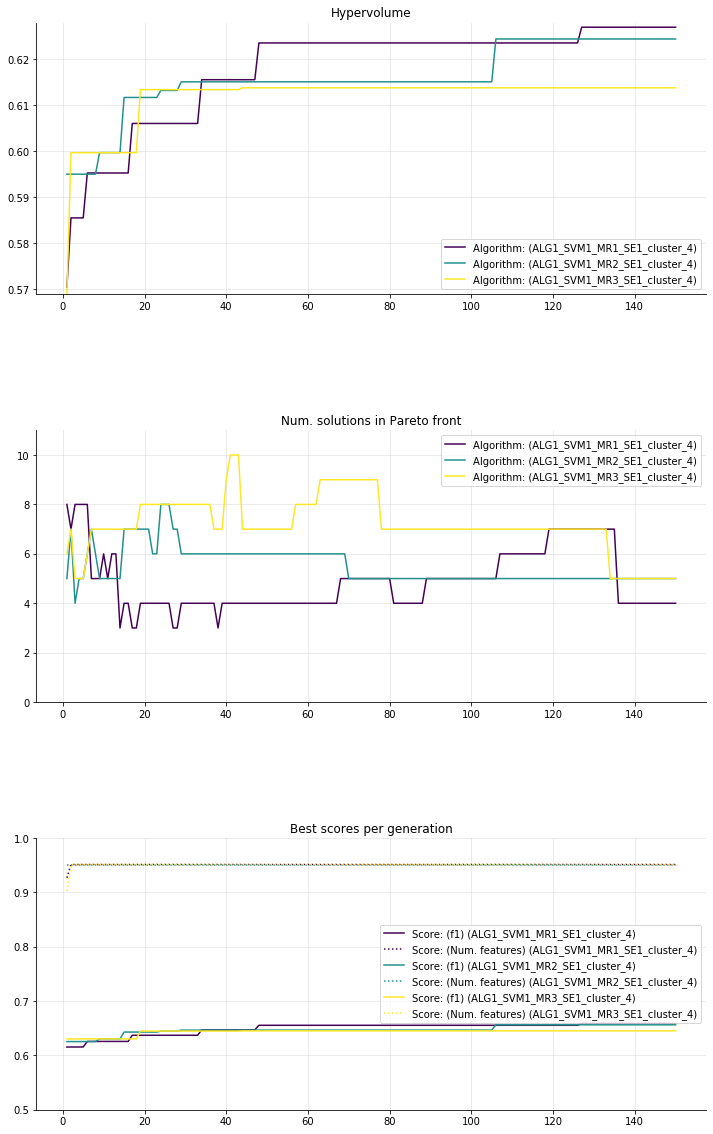

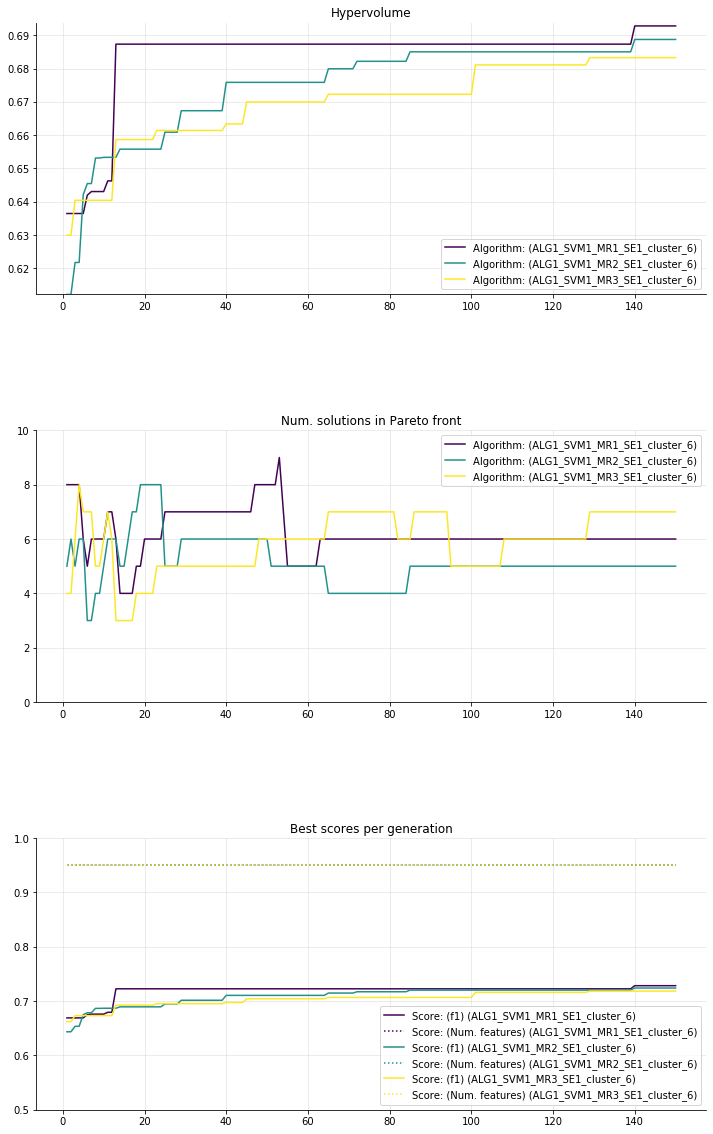

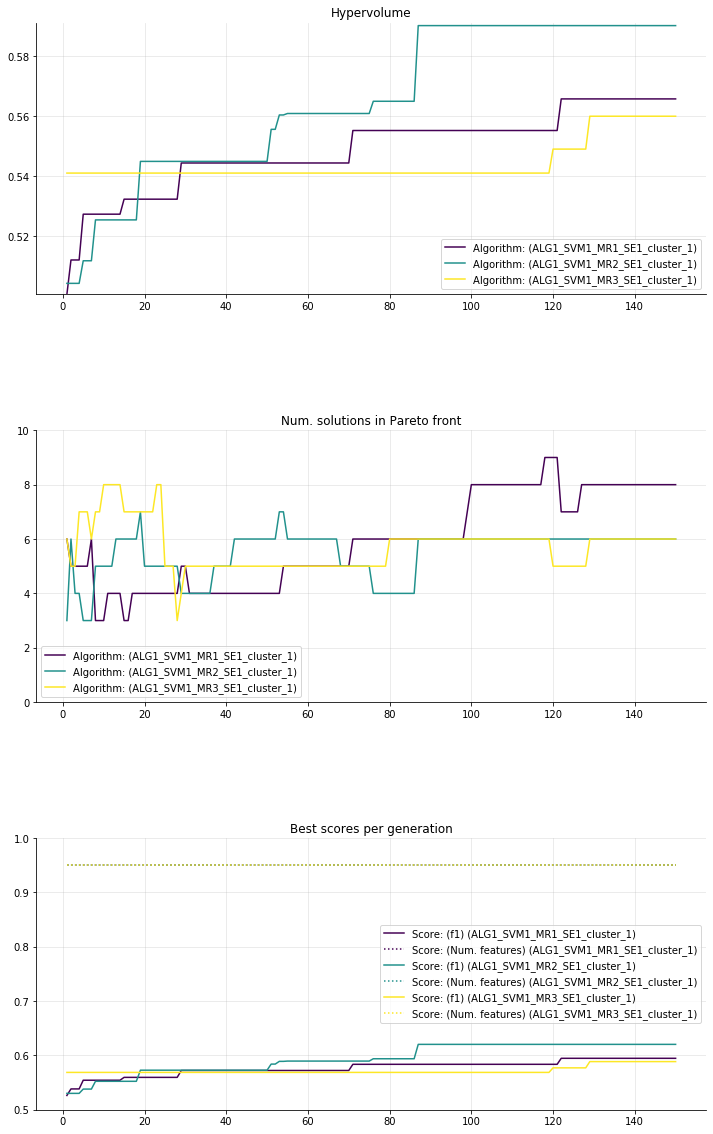

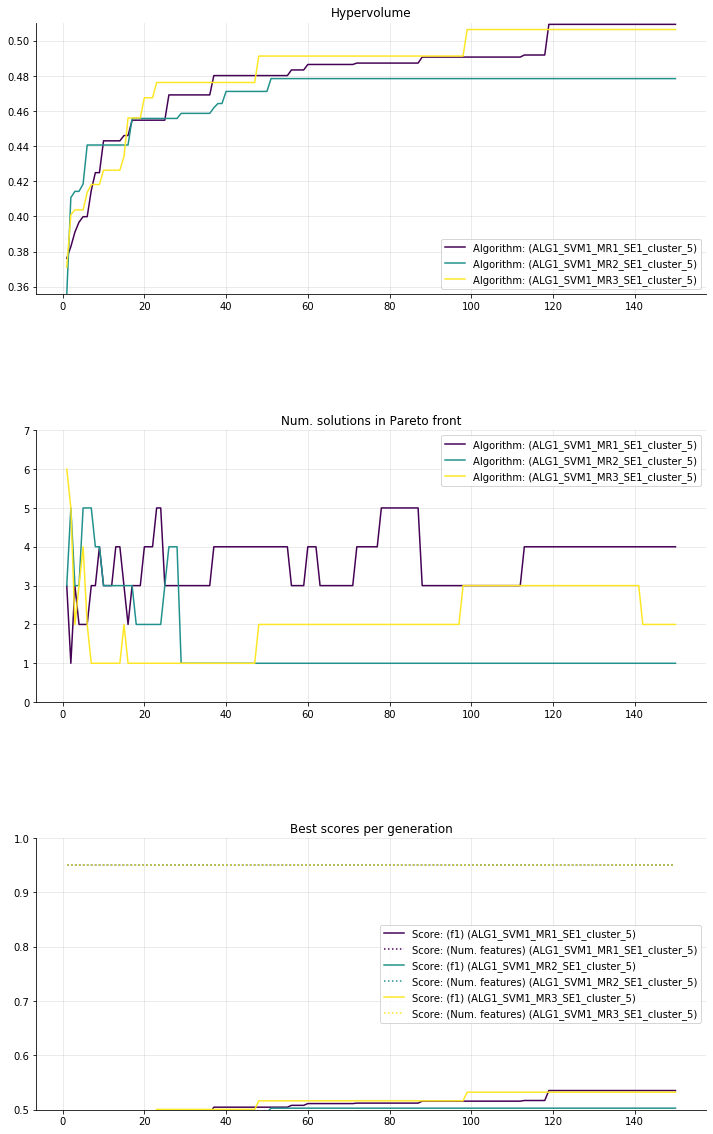

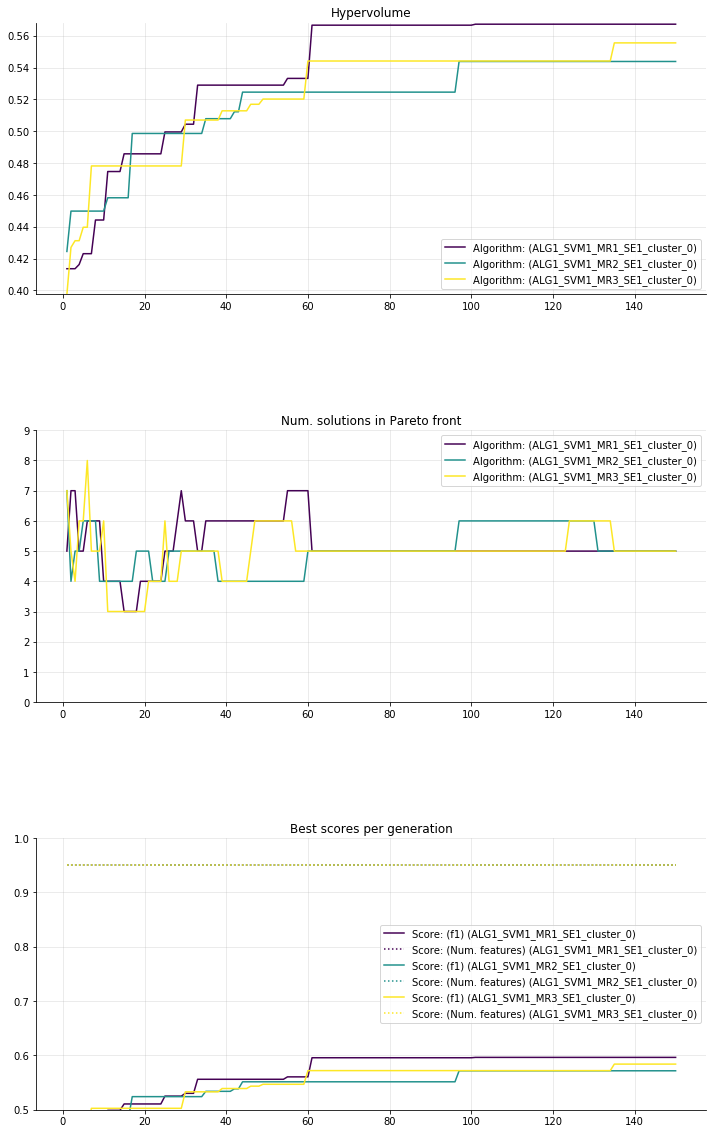

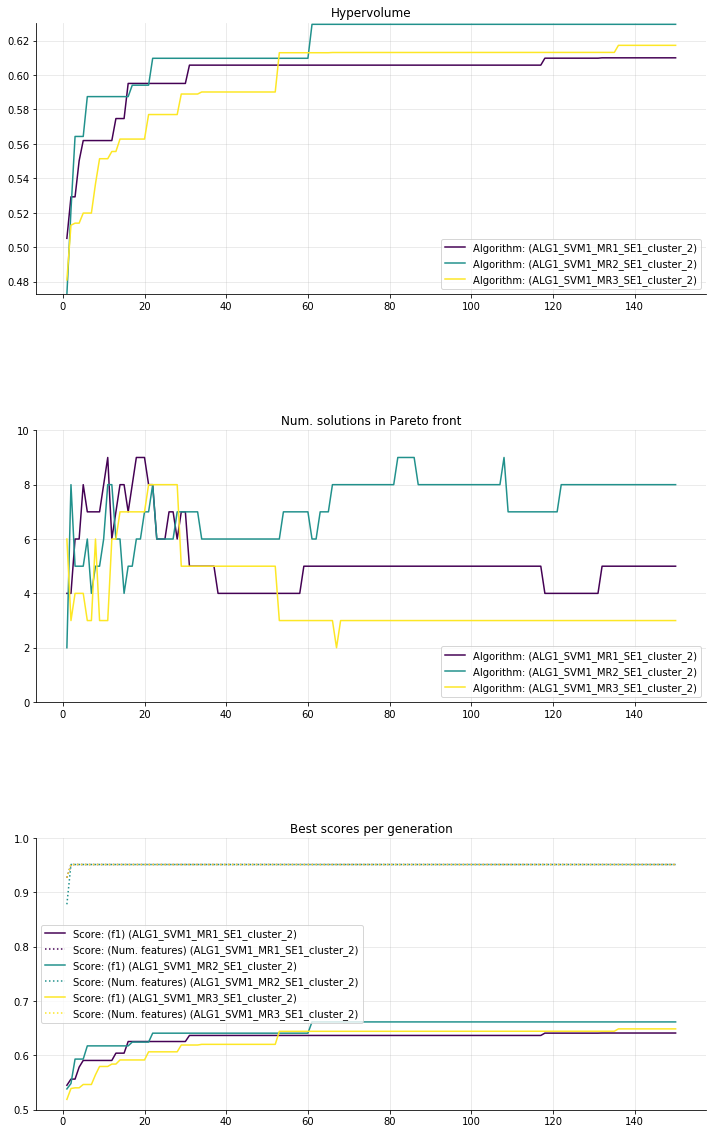

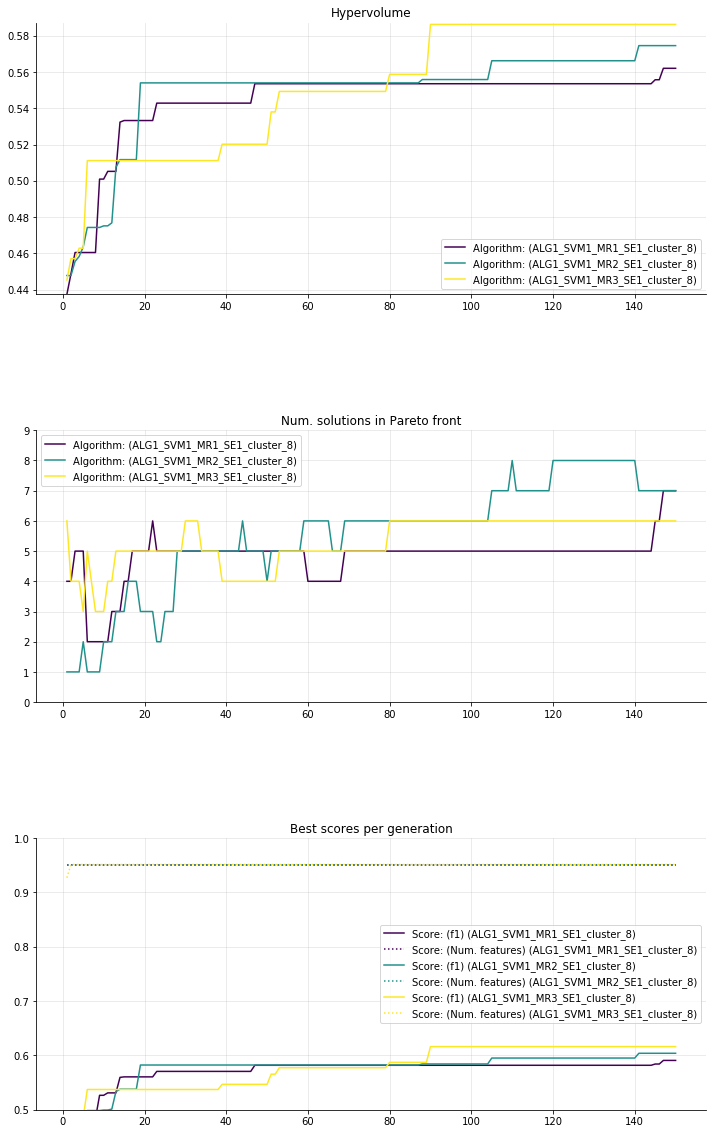

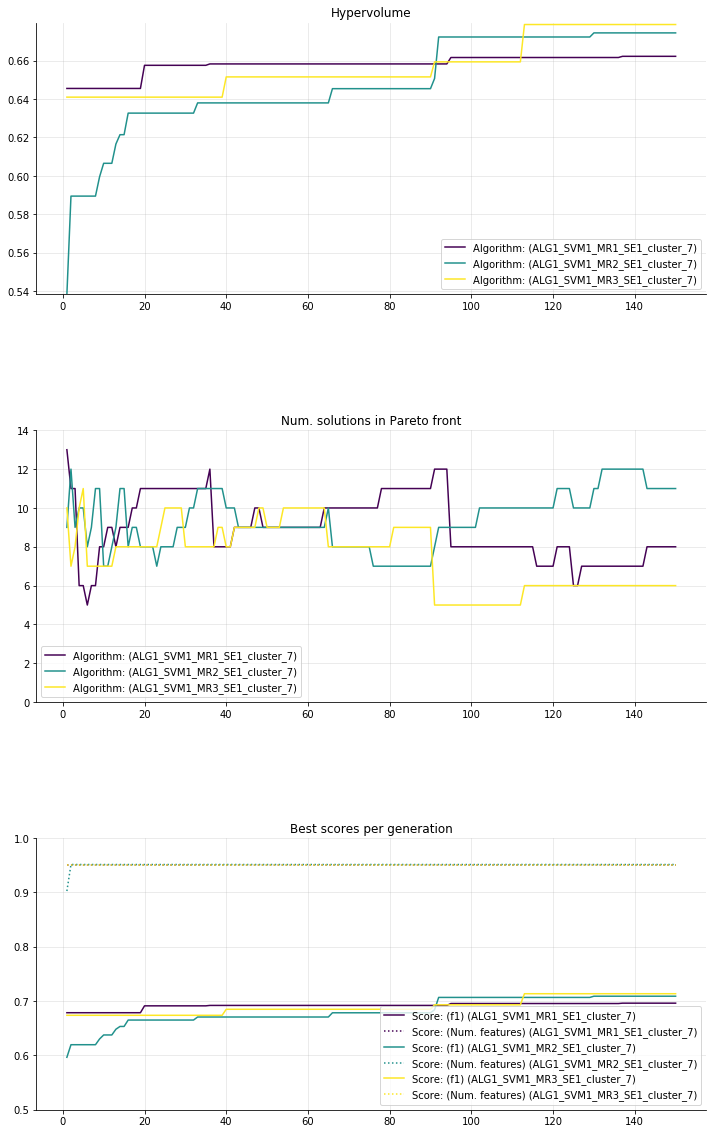

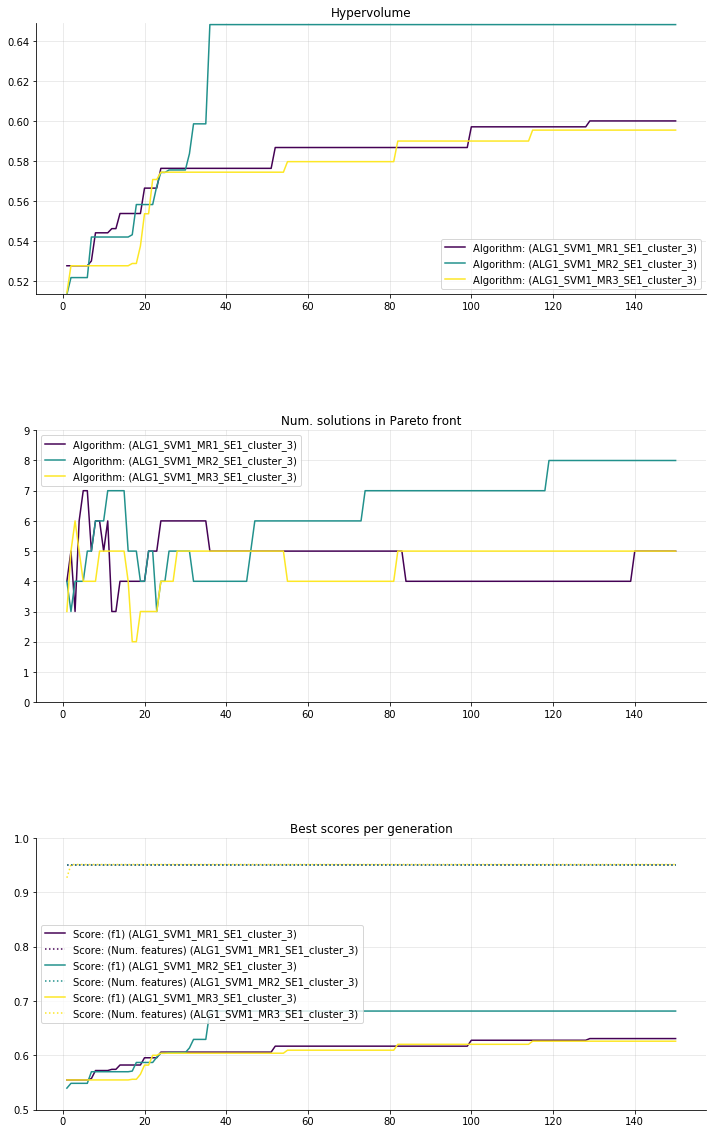

In [13]:
for task in tasks_clusters:
    Plotter.plot_evolution(*globals()[task])

While there is some variation among clusters and there is no value clearly better than other, the best results are generally obtained when the mutation rate is low or intermediate. This makes sense because high mutation rates do not allow good performers to stay at the top. Therefore, **a low value with tendency to turn intermediate and high should be considered**.

### 7. SE (SElection)

In this exploration, we study the effect of the selection procedure to choose individuals at each generation. We work with 2 different procedures **[TournamentSelection with 2 gladiators and 1 winner, TournamentSelection with 5 gladiators and 2 winners, RouletteWheel]**.

In [14]:
for task in tasks_clusters:
    globals()[task] = [model for model in os.listdir("./Exploration_multi_100/SE") if re.match('.*'+str(task),model)]
    globals()[task] = [NSGA2.load(model,"./Exploration_multi_100/SE") for model in globals()[task]]

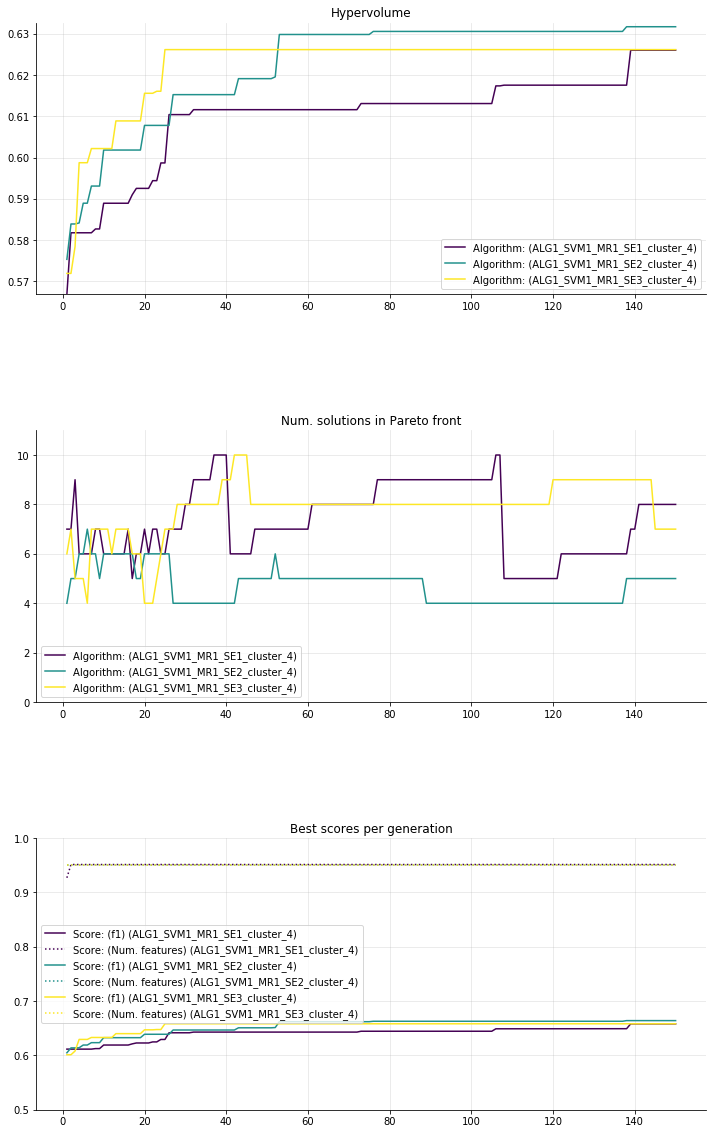

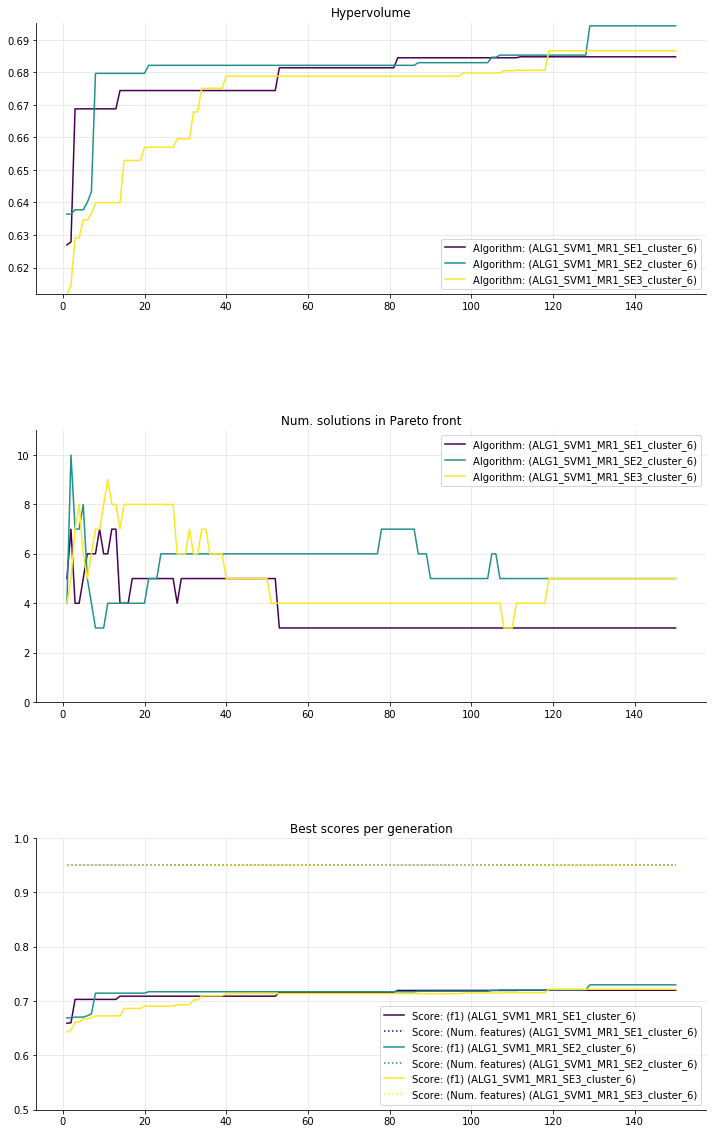

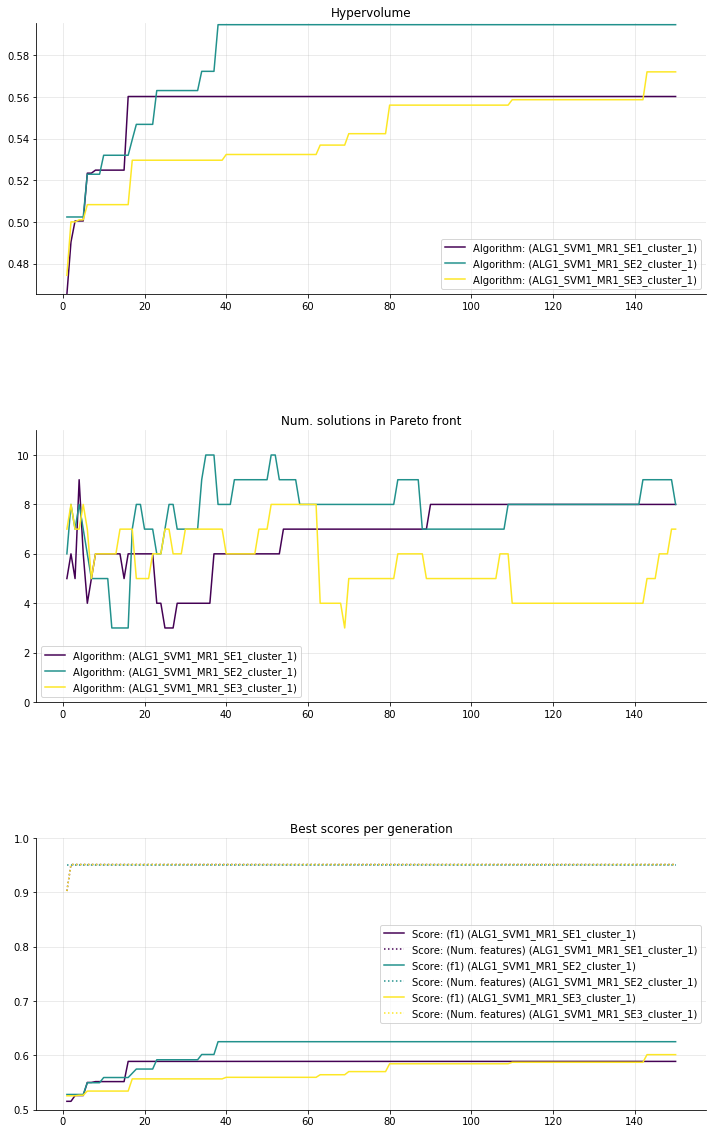

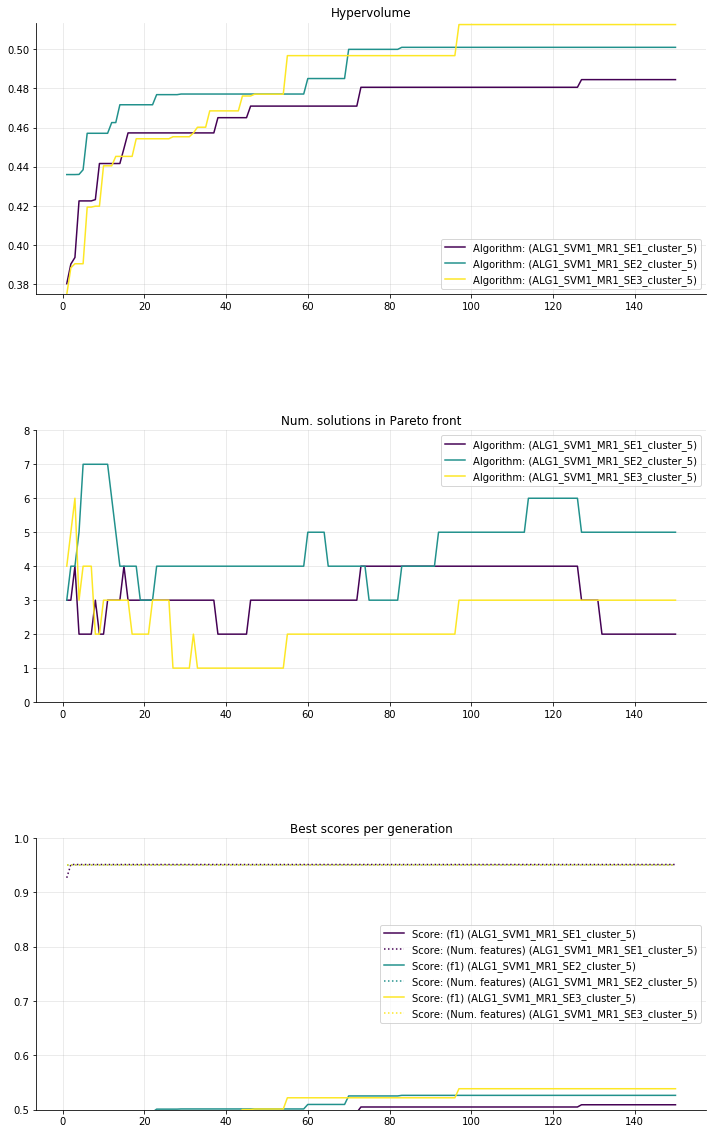

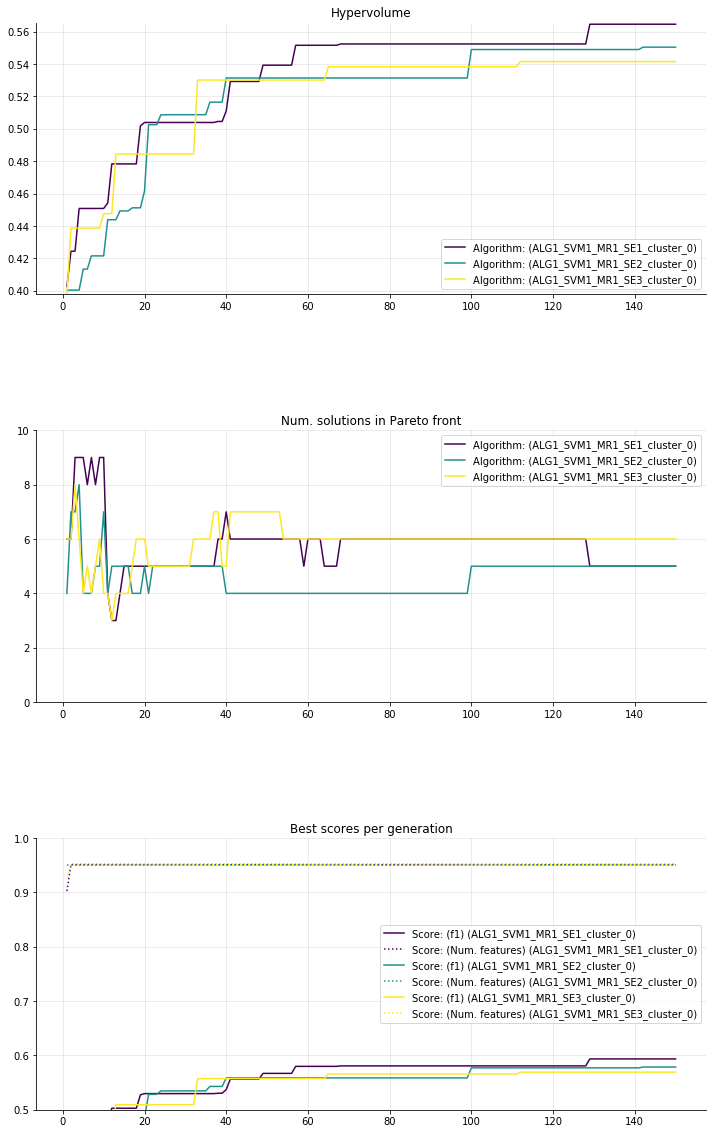

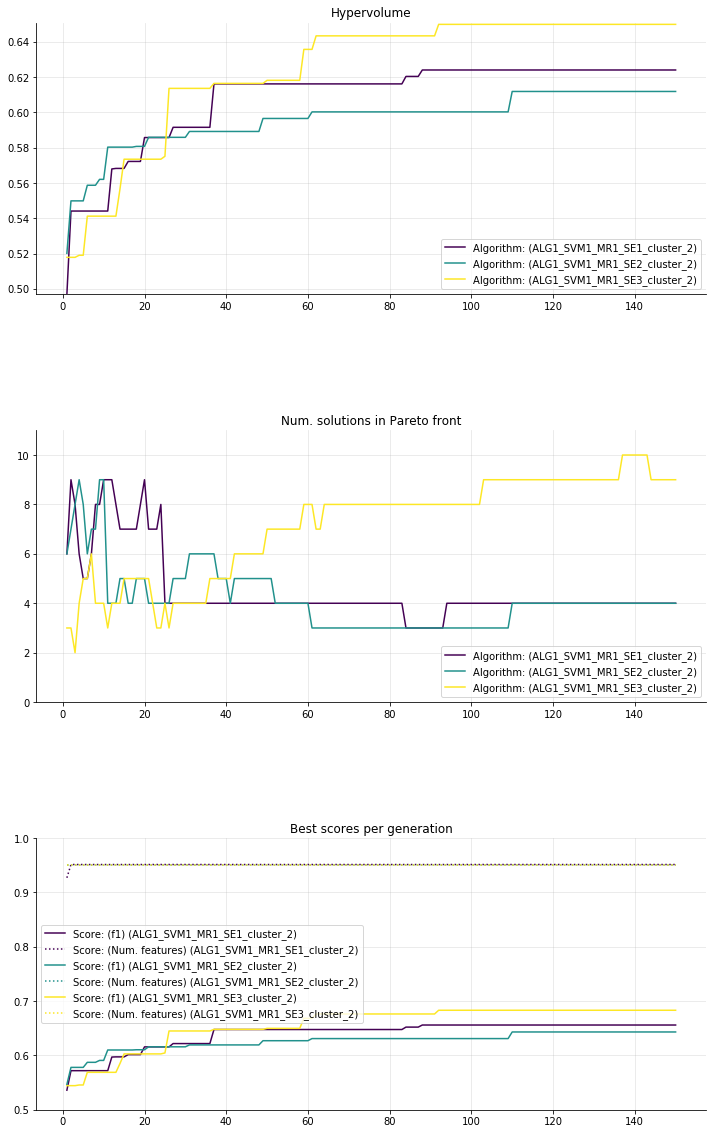

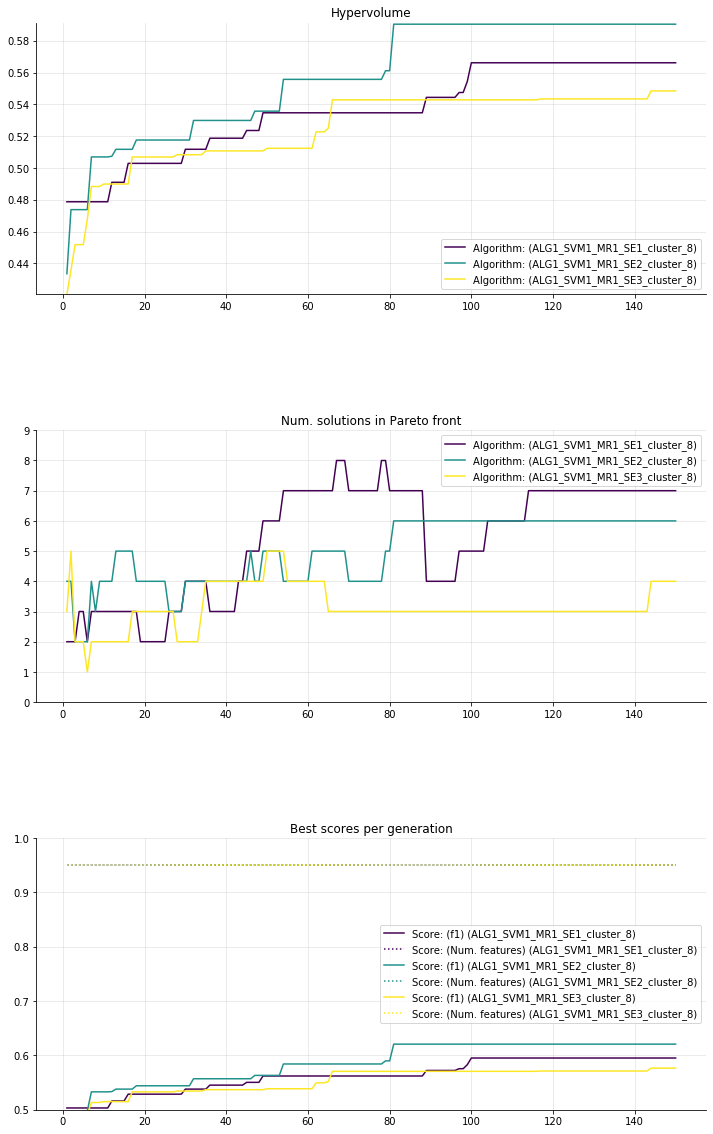

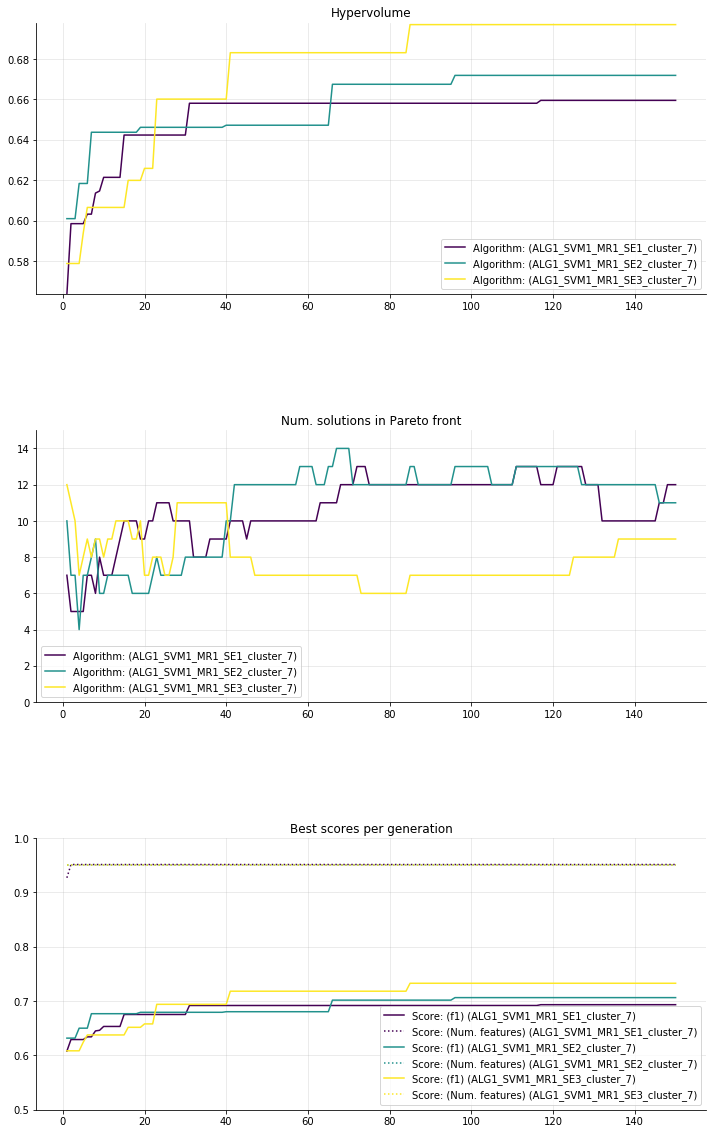

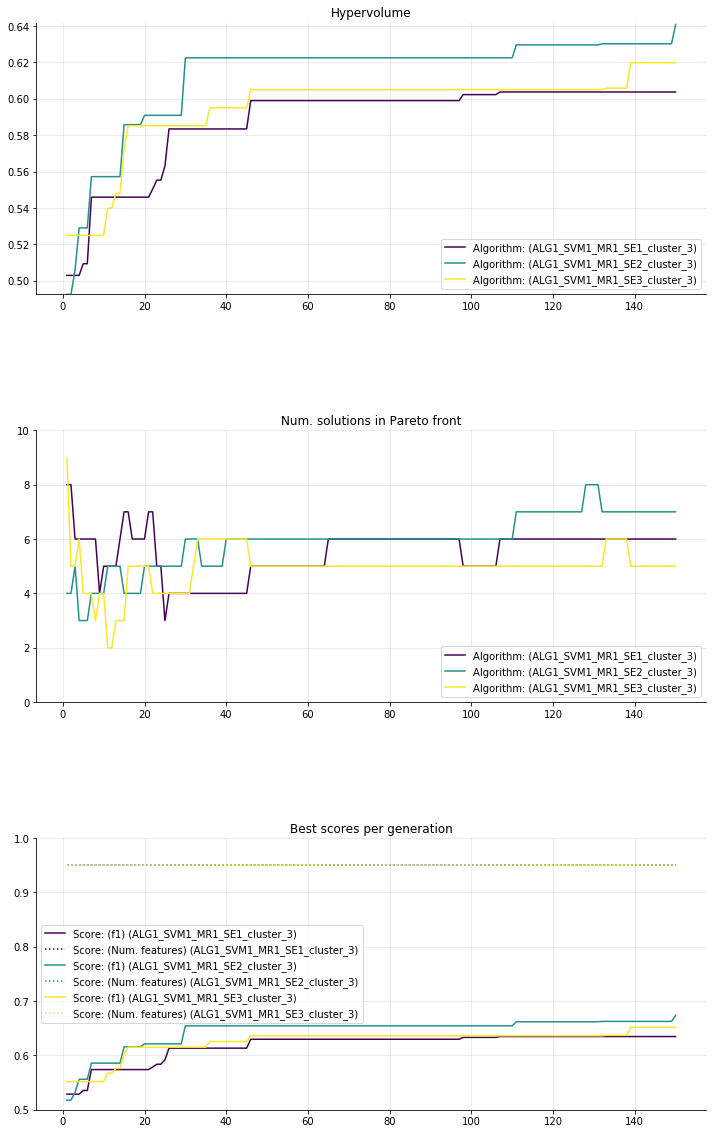

In [15]:
for task in tasks_clusters:
    Plotter.plot_evolution(*globals()[task])

While there is some variation among clusters, there seems to be a trend where Tournament Selection with high number of gladiators and RouletteWheel work better. Therefore, **TournamentSelection (many gladiators), with tendency to turn into RouletteWheel should be considered**.

### Conclusions

For the optimization stage, we will be using the following parameters:

- **Algorithm**: ALG1 (medium), ALG2 (medium)
- **Estimator**: SVM1 (low), SVM2 (medium), SVM3 (high)
- **Mutation rate**: MR1 (high), MR2 (medium), MR3 (low)
- **Selection**: SE1 (low), SE2 (high), SE3 (medium)